In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="ticks", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

## Data Import

In [2]:
df = pd.read_excel("Customer Churn Data.xlsx", sheet_name="Data for DSBA")

## Convert all columns to capital case for ease

In [3]:
df.columns = [x.upper() for x in df.columns]

## Head and Tail

In [4]:
df.head()

,ACCOUNTID,CHURN,TENURE,CITY_TIER,CC_CONTACTED_LY,PAYMENT,GENDER,SERVICE_SCORE,ACCOUNT_USER_COUNT,ACCOUNT_SEGMENT,CC_AGENT_SCORE,MARITAL_STATUS,REV_PER_MONTH,COMPLAIN_LY,REV_GROWTH_YOY,COUPON_USED_FOR_PAYMENT,DAY_SINCE_CC_CONNECT,CASHBACK,LOGIN_DEVICE
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [5]:
df.tail()

,ACCOUNTID,CHURN,TENURE,CITY_TIER,CC_CONTACTED_LY,PAYMENT,GENDER,SERVICE_SCORE,ACCOUNT_USER_COUNT,ACCOUNT_SEGMENT,CC_AGENT_SCORE,MARITAL_STATUS,REV_PER_MONTH,COMPLAIN_LY,REV_GROWTH_YOY,COUPON_USED_FOR_PAYMENT,DAY_SINCE_CC_CONNECT,CASHBACK,LOGIN_DEVICE
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


## Dataset information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ACCOUNTID                11260 non-null  int64  
 1   CHURN                    11260 non-null  int64  
 2   TENURE                   11158 non-null  object 
 3   CITY_TIER                11148 non-null  float64
 4   CC_CONTACTED_LY          11158 non-null  float64
 5   PAYMENT                  11151 non-null  object 
 6   GENDER                   11152 non-null  object 
 7   SERVICE_SCORE            11162 non-null  float64
 8   ACCOUNT_USER_COUNT       11148 non-null  object 
 9   ACCOUNT_SEGMENT          11163 non-null  object 
 10  CC_AGENT_SCORE           11144 non-null  float64
 11  MARITAL_STATUS           11048 non-null  object 
 12  REV_PER_MONTH            11158 non-null  object 
 13  COMPLAIN_LY              10903 non-null  float64
 14  REV_GROWTH_YOY        

## Data set balanced?

In [7]:
df['CHURN'].value_counts(normalize=True).mul(100)

0    83.161634
1    16.838366
Name: CHURN, dtype: float64

## Duplicate and NA checks

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

ACCOUNTID                    0
CHURN                        0
TENURE                     102
CITY_TIER                  112
CC_CONTACTED_LY            102
PAYMENT                    109
GENDER                     108
SERVICE_SCORE               98
ACCOUNT_USER_COUNT         112
ACCOUNT_SEGMENT             97
CC_AGENT_SCORE             116
MARITAL_STATUS             212
REV_PER_MONTH              102
COMPLAIN_LY                357
REV_GROWTH_YOY               0
COUPON_USED_FOR_PAYMENT      0
DAY_SINCE_CC_CONNECT       357
CASHBACK                   471
LOGIN_DEVICE               221
dtype: int64

## Dataset shape

In [10]:
df.shape

(11260, 19)

## Summary of the dataset

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ACCOUNTID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.5,28444.25,31259.0
CHURN,11260.0,0.168384,0.374223,0.0,0.00,0.0,0.00,1.0
CITY_TIER,11148.0,1.653929,0.915015,1.0,1.00,1.0,3.00,3.0
CC_CONTACTED_LY,11158.0,17.867091,8.853269,4.0,11.00,16.0,23.00,132.0
SERVICE_SCORE,11162.0,2.902526,0.725584,0.0,2.00,3.0,3.00,5.0
CC_AGENT_SCORE,11144.0,3.066493,1.379772,1.0,2.00,3.0,4.00,5.0
COMPLAIN_LY,10903.0,0.285334,0.451594,0.0,0.00,0.0,1.00,1.0


## Data type converstions and Data transformations

In [12]:
df['TENURE'].replace('#', '1', inplace=True)
df['GENDER'].replace('F', 'Female', inplace=True)
df['GENDER'].replace('M', 'Male', inplace=True)
df['ACCOUNT_USER_COUNT'].replace('@', '4', inplace=True)
df['REV_PER_MONTH'].replace('+', '3', inplace=True)
df['REV_GROWTH_YOY'].replace('$', '14', inplace=True)
df['COUPON_USED_FOR_PAYMENT'].replace('*', '1', inplace=True)
df['COUPON_USED_FOR_PAYMENT'].replace('#', '1', inplace=True)
df['COUPON_USED_FOR_PAYMENT'].replace('$', '1', inplace=True)
df['DAY_SINCE_CC_CONNECT'].replace('$', '3', inplace=True)
df['LOGIN_DEVICE'].replace('&&&&', 'Mobile', inplace=True)
df['CASHBACK'].fillna(0, inplace=True)
df['CASHBACK'] = df['CASHBACK'].replace('$', 0)

In [13]:
df['TENURE'] = pd.to_numeric(df['TENURE'])
df['ACCOUNT_USER_COUNT'] = pd.to_numeric(df['ACCOUNT_USER_COUNT'])
df['REV_PER_MONTH'] = pd.to_numeric(df['REV_PER_MONTH'])
df['REV_GROWTH_YOY'] = pd.to_numeric(df['REV_GROWTH_YOY'])
df['COUPON_USED_FOR_PAYMENT'] = pd.to_numeric(df['COUPON_USED_FOR_PAYMENT'])
df['DAY_SINCE_CC_CONNECT'] = pd.to_numeric(df['DAY_SINCE_CC_CONNECT'])

## Categorical data summary

In [14]:
for column in df.columns:
    if (df[column].dtype == 'object'):        
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: PAYMENT, dtype: int64


GENDER :  2
Female    4448
Male      6704
Name: GENDER, dtype: int64


ACCOUNT_SEGMENT :  7
Super +           47
Regular +        262
Regular          520
Super Plus       771
HNI             1639
Regular Plus    3862
Super           4062
Name: ACCOUNT_SEGMENT, dtype: int64


MARITAL_STATUS :  3
Divorced    1668
Single      3520
Married     5860
Name: MARITAL_STATUS, dtype: int64


LOGIN_DEVICE :  2
Computer    3018
Mobile      8021
Name: LOGIN_DEVICE, dtype: int64




## Exploratory Data Analysis

### Numeric feature Uni variate analysis

Text(0.5, 1.0, 'SERVICE_SCORE Distribution')

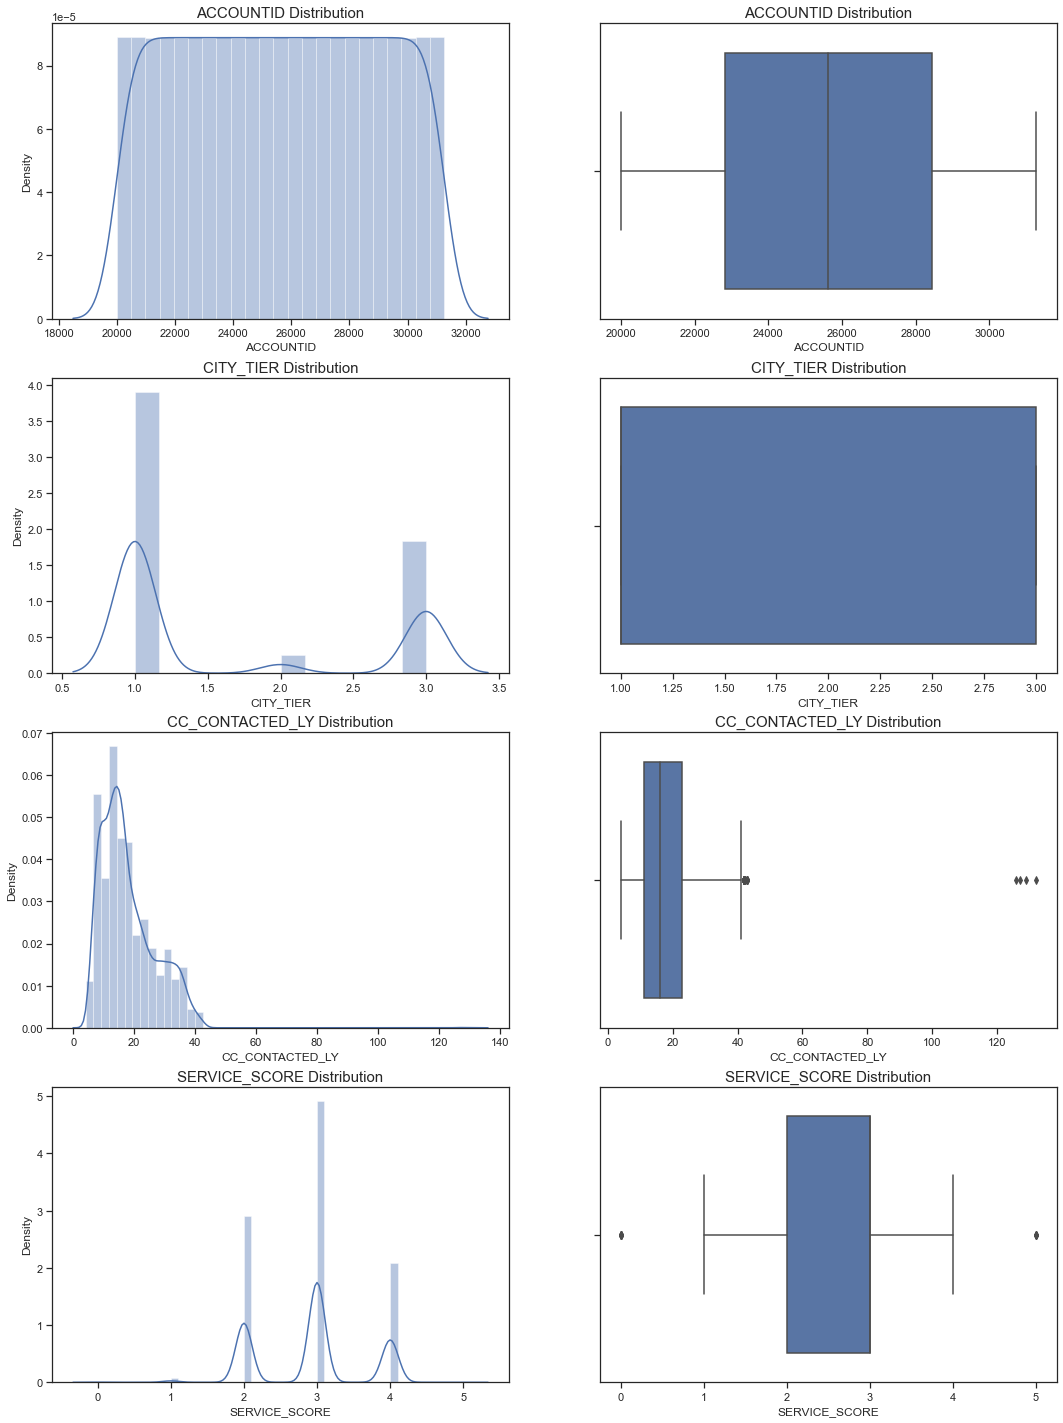

In [15]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(18, 25)

a = sns.distplot(df['ACCOUNTID'] , ax=axes[0][0])
a.set_title("ACCOUNTID Distribution",fontsize=15)
a = sns.boxplot(df['ACCOUNTID'] , orient = "v" , ax=axes[0][1])
a.set_title("ACCOUNTID Distribution",fontsize=15)

a = sns.distplot(df['CITY_TIER'] , ax=axes[1][0])
a.set_title("CITY_TIER Distribution",fontsize=15)
a = sns.boxplot(df['CITY_TIER'] , orient = "v" , ax=axes[1][1])
a.set_title("CITY_TIER Distribution",fontsize=15)

a = sns.distplot(df['CC_CONTACTED_LY'] , ax=axes[2][0])
a.set_title("CC_CONTACTED_LY Distribution",fontsize=15)
a = sns.boxplot(df['CC_CONTACTED_LY'] , orient = "v" , ax=axes[2][1])
a.set_title("CC_CONTACTED_LY Distribution",fontsize=15)

a = sns.distplot(df['SERVICE_SCORE'] , ax=axes[3][0])
a.set_title("SERVICE_SCORE Distribution",fontsize=15)
a = sns.boxplot(df['SERVICE_SCORE'] , orient = "h" , ax=axes[3][1])
a.set_title("SERVICE_SCORE Distribution",fontsize=15)

Text(0.5, 1.0, 'REV_GROWTH_YOY Distribution')

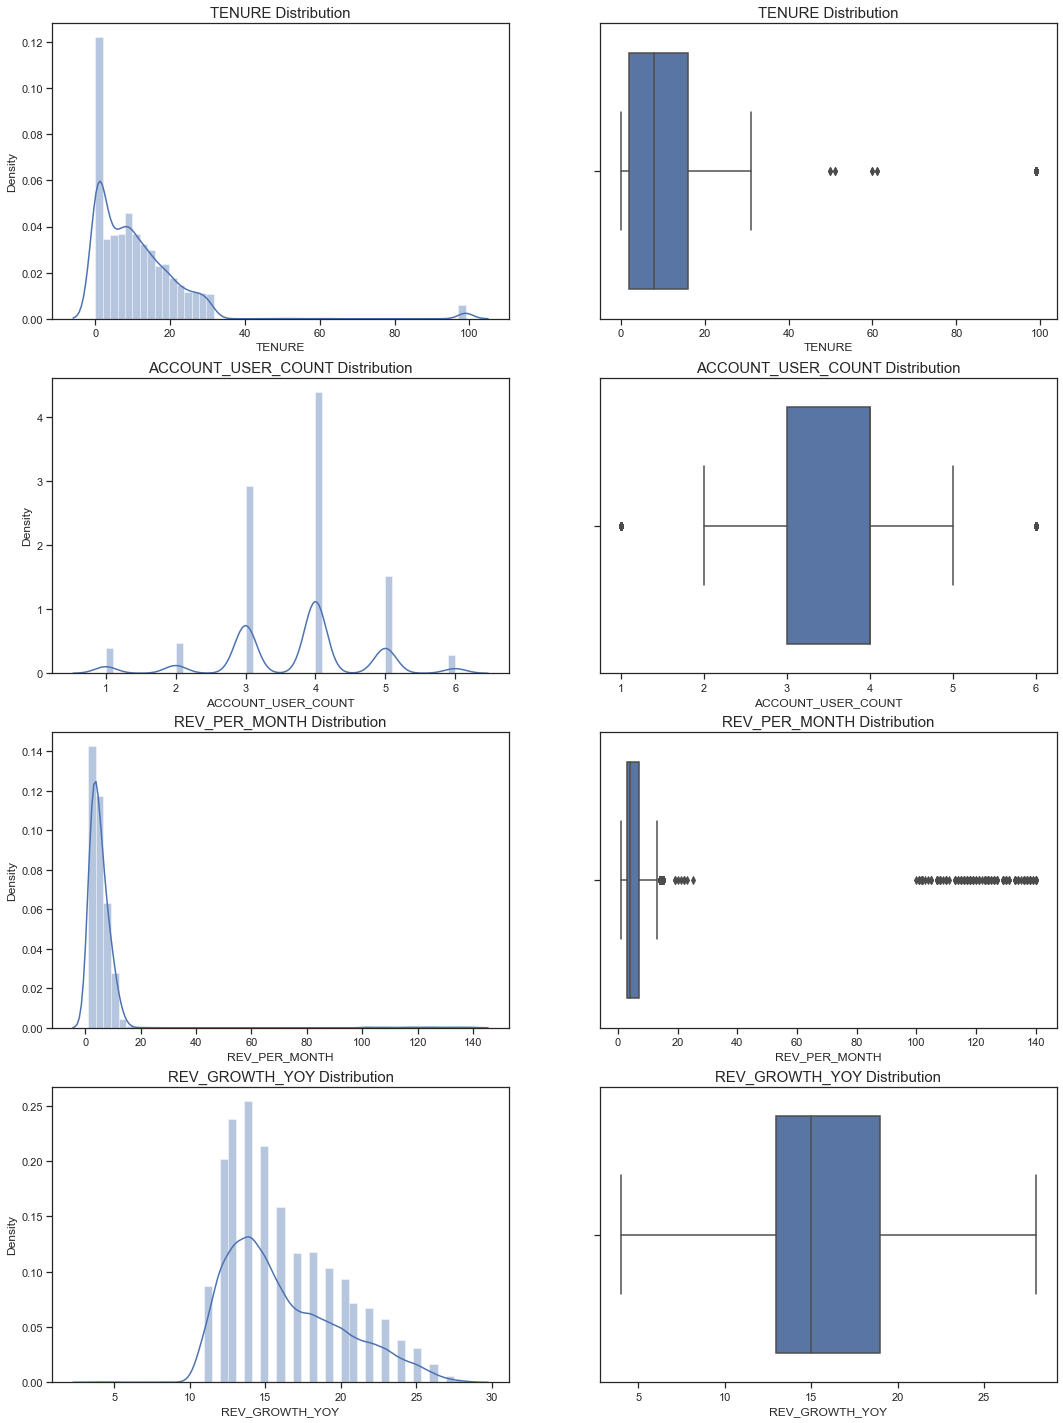

In [16]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(18, 25)

a = sns.distplot(df['TENURE'] , ax=axes[0][0])
a.set_title("TENURE Distribution",fontsize=15)
a = sns.boxplot(df['TENURE'] , orient = "v" , ax=axes[0][1])
a.set_title("TENURE Distribution",fontsize=15)

a = sns.distplot(df['ACCOUNT_USER_COUNT'] , ax=axes[1][0])
a.set_title("ACCOUNT_USER_COUNT Distribution",fontsize=15)
a = sns.boxplot(df['ACCOUNT_USER_COUNT'] , orient = "v" , ax=axes[1][1])
a.set_title("ACCOUNT_USER_COUNT Distribution",fontsize=15)

a = sns.distplot(df['REV_PER_MONTH'] , ax=axes[2][0])
a.set_title("REV_PER_MONTH Distribution",fontsize=15)
a = sns.boxplot(df['REV_PER_MONTH'] , orient = "v" , ax=axes[2][1])
a.set_title("REV_PER_MONTH Distribution",fontsize=15)

a = sns.distplot(df['REV_GROWTH_YOY'] , ax=axes[3][0])
a.set_title("REV_GROWTH_YOY Distribution",fontsize=15)
a = sns.boxplot(df['REV_GROWTH_YOY'] , orient = "h" , ax=axes[3][1])
a.set_title("REV_GROWTH_YOY Distribution",fontsize=15)

Text(0.5, 1.0, 'DAY_SINCE_CC_CONNECT Distribution')

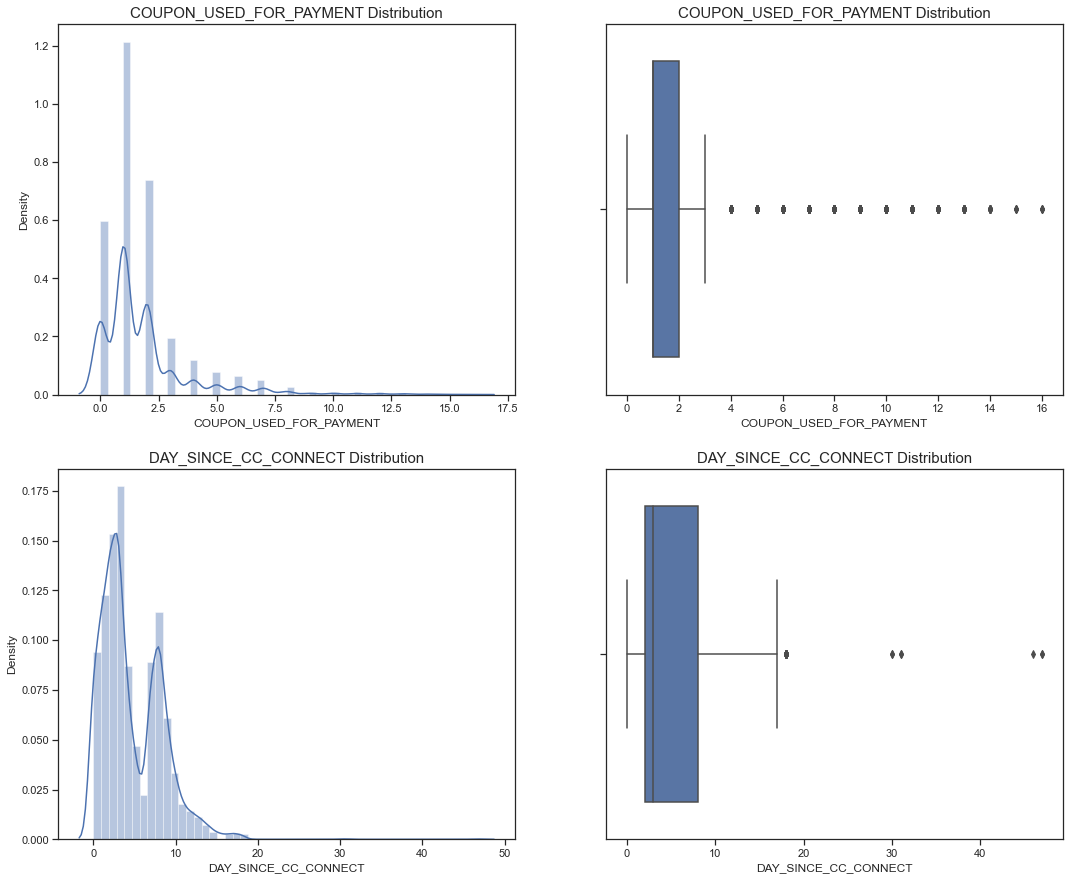

In [17]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(18, 15)

a = sns.distplot(df['COUPON_USED_FOR_PAYMENT'] , ax=axes[0][0])
a.set_title("COUPON_USED_FOR_PAYMENT Distribution",fontsize=15)
a = sns.boxplot(df['COUPON_USED_FOR_PAYMENT'] , orient = "v" , ax=axes[0][1])
a.set_title("COUPON_USED_FOR_PAYMENT Distribution",fontsize=15)

a = sns.distplot(df['DAY_SINCE_CC_CONNECT'] , ax=axes[1][0])
a.set_title("DAY_SINCE_CC_CONNECT Distribution",fontsize=15)
a = sns.boxplot(df['DAY_SINCE_CC_CONNECT'] , orient = "v" , ax=axes[1][1])
a.set_title("DAY_SINCE_CC_CONNECT Distribution",fontsize=15)

Text(0.5, 1.0, 'CASHBACK Distribution')

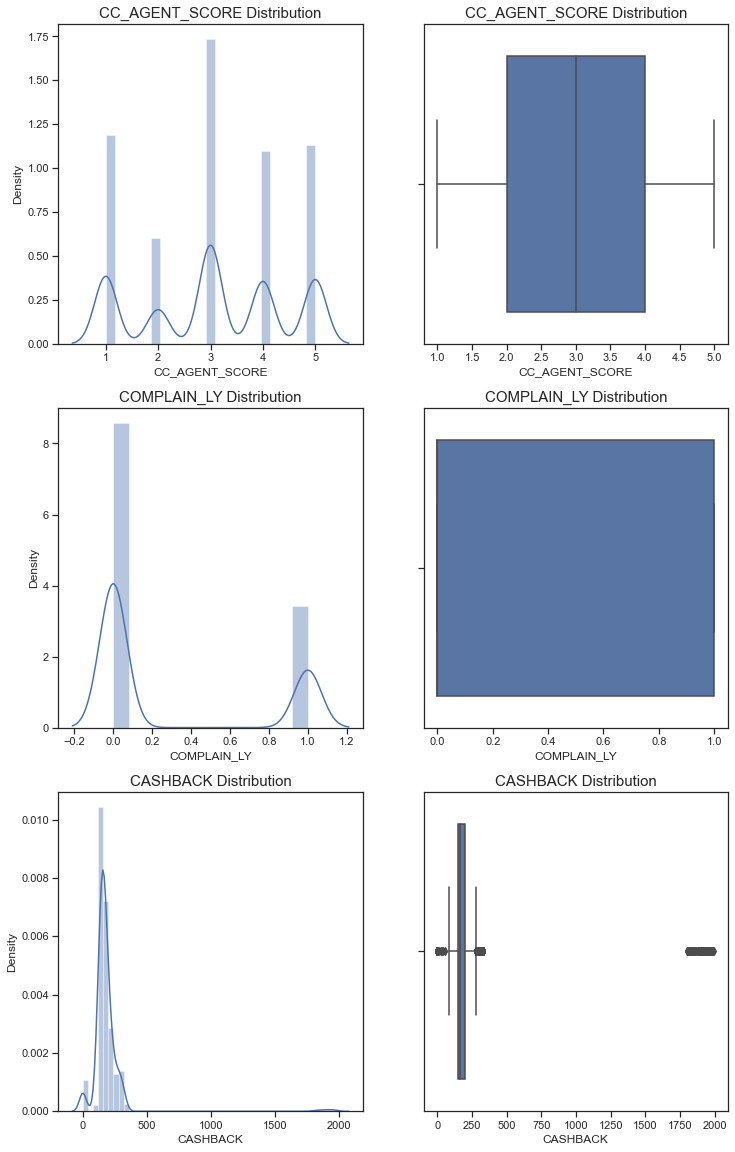

In [18]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12, 20)


a = sns.distplot(df['CC_AGENT_SCORE'] , ax=axes[0][0])
a.set_title("CC_AGENT_SCORE Distribution",fontsize=15)
a = sns.boxplot(df['CC_AGENT_SCORE'] , orient = "v" , ax=axes[0][1])
a.set_title("CC_AGENT_SCORE Distribution",fontsize=15)

a = sns.distplot(df['COMPLAIN_LY'] , ax=axes[1][0])
a.set_title("COMPLAIN_LY Distribution",fontsize=15)
a = sns.boxplot(df['COMPLAIN_LY'] , orient = "v" , ax=axes[1][1])
a.set_title("COMPLAIN_LY Distribution",fontsize=15)

a = sns.distplot(df['CASHBACK'] , ax=axes[2][0])
a.set_title("CASHBACK Distribution",fontsize=15)
a = sns.boxplot(df['CASHBACK'] , orient = "v" , ax=axes[2][1])
a.set_title("CASHBACK Distribution",fontsize=15)

### Categorical variable analysis

Text(0.5, 1.0, 'LOGIN_DEVICE Distribution')

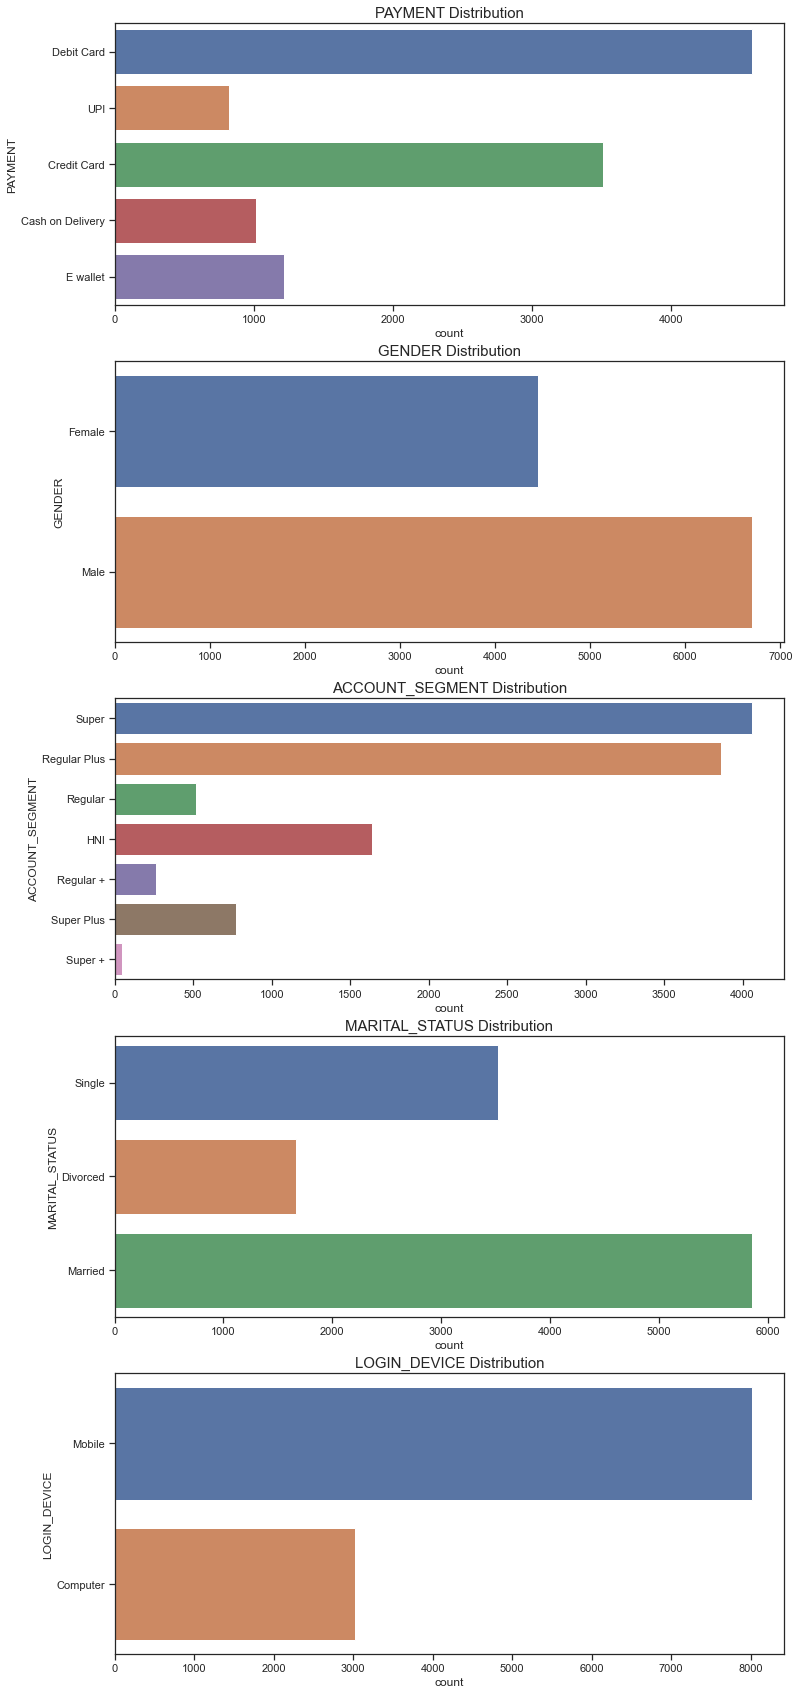

In [19]:
fig, axes = plt.subplots(nrows=5,ncols=1)
fig.set_size_inches(12, 30)

a = sns.countplot(y='PAYMENT', data=df, ax=axes[0])
a.set_title("PAYMENT Distribution",fontsize=15)

a = sns.countplot(y='GENDER', data=df, ax=axes[1])
a.set_title("GENDER Distribution",fontsize=15)

a = sns.countplot(y='ACCOUNT_SEGMENT', data=df, ax=axes[2])
a.set_title("ACCOUNT_SEGMENT Distribution",fontsize=15)

a = sns.countplot(y='MARITAL_STATUS', data=df, ax=axes[3])
a.set_title("MARITAL_STATUS Distribution",fontsize=15)

a = sns.countplot(y='LOGIN_DEVICE', data=df, ax=axes[4])
a.set_title("LOGIN_DEVICE Distribution",fontsize=15)

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ACCOUNTID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.50,28444.25,31259.0
CHURN,11260.0,0.168384,0.374223,0.0,0.00,0.00,0.00,1.0
TENURE,11158.0,10.920864,12.852941,0.0,2.00,8.00,16.00,99.0
CITY_TIER,11148.0,1.653929,0.915015,1.0,1.00,1.00,3.00,3.0
CC_CONTACTED_LY,11158.0,17.867091,8.853269,4.0,11.00,16.00,23.00,132.0
SERVICE_SCORE,11162.0,2.902526,0.725584,0.0,2.00,3.00,3.00,5.0
ACCOUNT_USER_COUNT,11148.0,3.702009,1.008979,1.0,3.00,4.00,4.00,6.0
CC_AGENT_SCORE,11144.0,3.066493,1.379772,1.0,2.00,3.00,4.00,5.0
REV_PER_MONTH,11158.0,6.154956,11.564446,1.0,3.00,4.00,7.00,140.0
COMPLAIN_LY,10903.0,0.285334,0.451594,0.0,0.00,0.00,1.00,1.0


## Bi Variate Analysis

In [21]:
df.corr(method='pearson')

,ACCOUNTID,CHURN,TENURE,CITY_TIER,CC_CONTACTED_LY,SERVICE_SCORE,ACCOUNT_USER_COUNT,CC_AGENT_SCORE,REV_PER_MONTH,COMPLAIN_LY,REV_GROWTH_YOY,COUPON_USED_FOR_PAYMENT,DAY_SINCE_CC_CONNECT,CASHBACK
ACCOUNTID,1.000000,-0.009541,0.005659,0.001983,0.252562,0.301782,0.201430,-0.017715,0.071482,-0.005168,0.170600,0.105773,0.062811,0.025578
CHURN,-0.009541,1.000000,-0.231967,0.084135,0.072071,0.008991,0.105096,0.105796,0.022604,0.251488,-0.013806,-0.014777,-0.147935,-0.032276
TENURE,0.005659,-0.231967,1.000000,-0.030138,-0.003762,0.008532,-0.003016,-0.019053,0.028942,-0.022475,0.019517,0.089245,0.122491,0.080566
CITY_TIER,0.001983,0.084135,-0.030138,1.000000,0.011835,-0.006443,0.024735,-0.011479,-0.027072,0.002478,-0.030022,0.021119,0.023186,0.012221
CC_CONTACTED_LY,0.252562,0.072071,-0.003762,0.011835,1.000000,0.060052,0.020702,-0.000209,0.014728,0.027244,0.072702,0.005012,0.012969,0.002198
SERVICE_SCORE,0.301782,0.008991,0.008532,-0.006443,0.060052,1.000000,0.318153,0.032135,0.025892,0.002643,0.103478,0.181932,0.099812,0.042226
ACCOUNT_USER_COUNT,0.201430,0.105096,-0.003016,0.024735,0.020702,0.318153,1.000000,-0.017493,0.017297,0.003129,0.066476,0.143567,0.036547,0.037108
CC_AGENT_SCORE,-0.017715,0.105796,-0.019053,-0.011479,-0.000209,0.032135,-0.017493,1.000000,0.021191,-0.031459,-0.027149,0.030740,0.030779,-0.010352
REV_PER_MONTH,0.071482,0.022604,0.028942,-0.027072,0.014728,0.025892,0.017297,0.021191,1.000000,-0.002017,0.024370,0.016831,-0.001064,0.008260
COMPLAIN_LY,-0.005168,0.251488,-0.022475,0.002478,0.027244,0.002643,0.003129,-0.031459,-0.002017,1.000000,-0.005019,-0.006952,-0.041172,0.004072


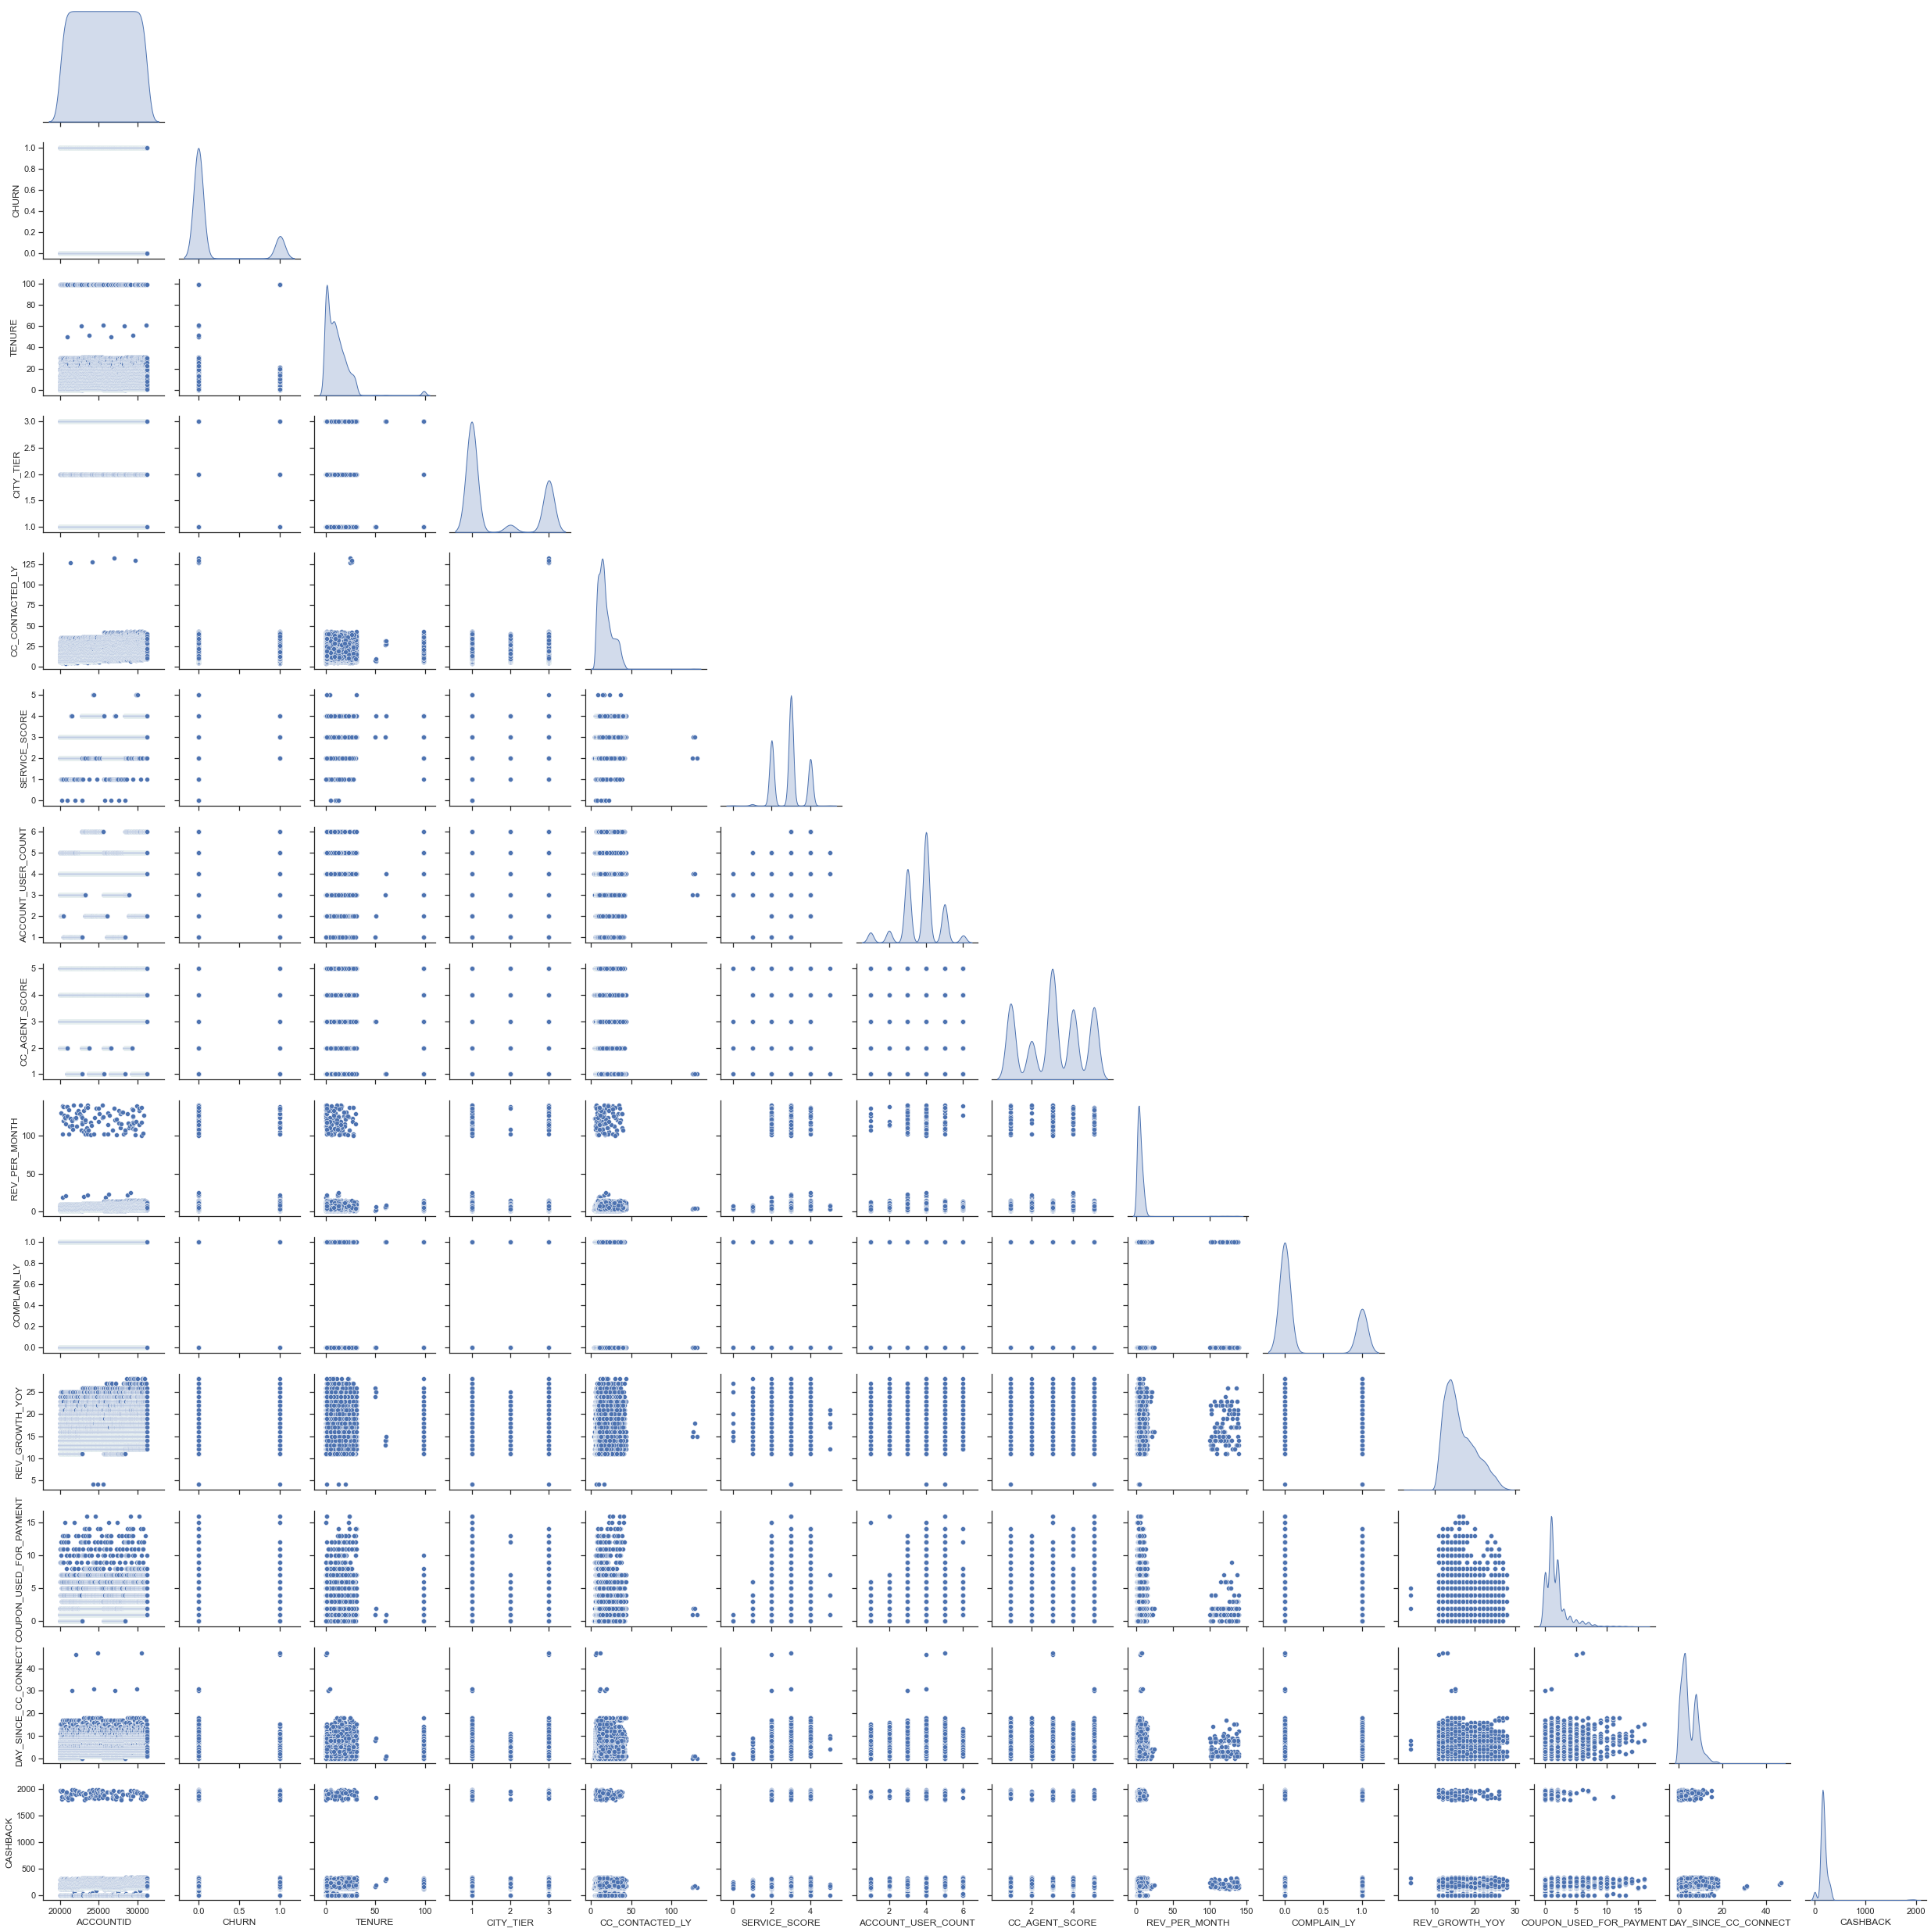

In [22]:
sns.pairplot(df,diag_kind='kde',corner=True)

In [23]:
noacntdf = df.drop('ACCOUNTID', axis=1)

<AxesSubplot:>

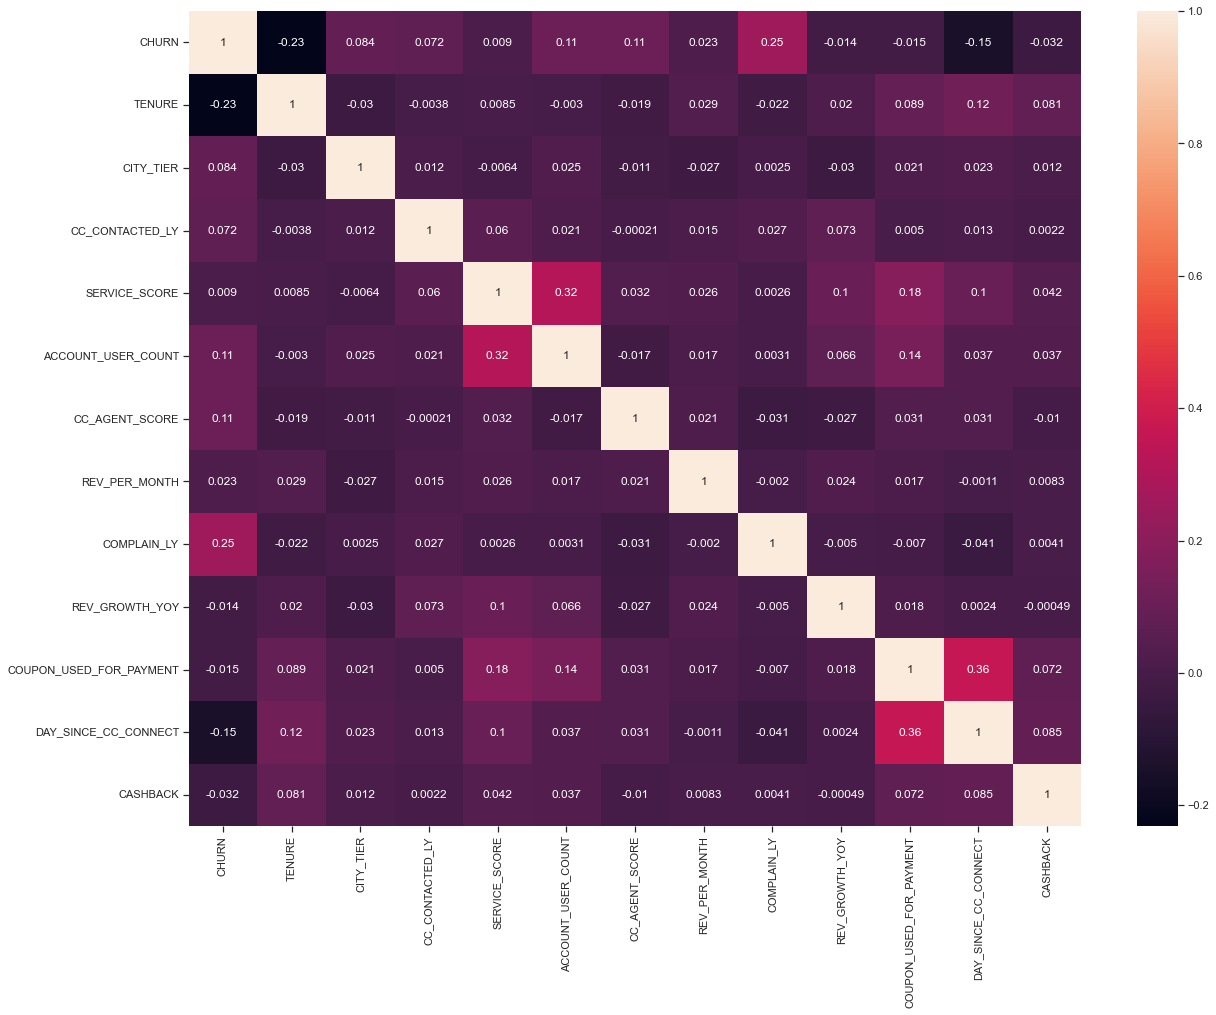

In [24]:
plt.subplots(figsize=(20,15))
sns.heatmap(noacntdf.corr(), annot=True)  # plot the correlation coefficients as a heatmap

In [25]:
df.isna().sum()

ACCOUNTID                    0
CHURN                        0
TENURE                     102
CITY_TIER                  112
CC_CONTACTED_LY            102
PAYMENT                    109
GENDER                     108
SERVICE_SCORE               98
ACCOUNT_USER_COUNT         112
ACCOUNT_SEGMENT             97
CC_AGENT_SCORE             116
MARITAL_STATUS             212
REV_PER_MONTH              102
COMPLAIN_LY                357
REV_GROWTH_YOY               0
COUPON_USED_FOR_PAYMENT      0
DAY_SINCE_CC_CONNECT       357
CASHBACK                     0
LOGIN_DEVICE               221
dtype: int64

# Data Cleaning and Pre Processing

## Unique Value Analysis

In [26]:
unique_counts = []
for col in df.columns:
    unique_counts.append((col, df[col].nunique()))
unique_counts = sorted(unique_counts, key=lambda x: x[1],reverse = True)
print("No of unique values in each column are as follows:(In Descending order)\n")
for col,nunique in unique_counts:
    print(f"{col}: {nunique}: {round(nunique/6019*100,2)}%")

No of unique values in each column are as follows:(In Descending order)

ACCOUNTID: 11260: 187.07%
CASHBACK: 5692: 94.57%
REV_PER_MONTH: 58: 0.96%
CC_CONTACTED_LY: 44: 0.73%
TENURE: 37: 0.61%
DAY_SINCE_CC_CONNECT: 23: 0.38%
REV_GROWTH_YOY: 19: 0.32%
COUPON_USED_FOR_PAYMENT: 17: 0.28%
ACCOUNT_SEGMENT: 7: 0.12%
SERVICE_SCORE: 6: 0.1%
ACCOUNT_USER_COUNT: 6: 0.1%
PAYMENT: 5: 0.08%
CC_AGENT_SCORE: 5: 0.08%
CITY_TIER: 3: 0.05%
MARITAL_STATUS: 3: 0.05%
CHURN: 2: 0.03%
GENDER: 2: 0.03%
COMPLAIN_LY: 2: 0.03%
LOGIN_DEVICE: 2: 0.03%


## Missing Value Analysis

In [27]:
def get_missing_data_details(df):
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False,)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
    missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing = missing[missing["Percent"]>0]
  
    plt.figure(figsize = (5,5))
    sns.barplot(missing["Percent"],missing.index)
    plt.ylabel('Features', fontsize=15)
    plt.xlabel('Percentage', fontsize=15)
    plt.title('Missing Data %', fontsize=15)

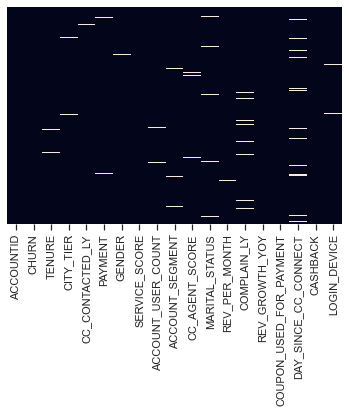

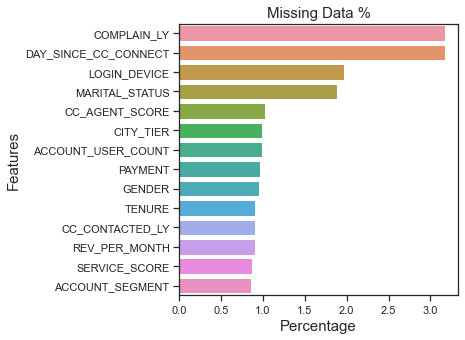

In [28]:
get_missing_data_details(df)

In [29]:
for col in df.columns:
    if df[col].isnull().sum()!=0:
        print(f"{col}: {df[col].isnull().sum()}: {round(df[col].isnull().mean()*100,2)}%")

TENURE: 102: 0.91%
CITY_TIER: 112: 0.99%
CC_CONTACTED_LY: 102: 0.91%
PAYMENT: 109: 0.97%
GENDER: 108: 0.96%
SERVICE_SCORE: 98: 0.87%
ACCOUNT_USER_COUNT: 112: 0.99%
ACCOUNT_SEGMENT: 97: 0.86%
CC_AGENT_SCORE: 116: 1.03%
MARITAL_STATUS: 212: 1.88%
REV_PER_MONTH: 102: 0.91%
COMPLAIN_LY: 357: 3.17%
DAY_SINCE_CC_CONNECT: 357: 3.17%
LOGIN_DEVICE: 221: 1.96%


In [30]:
df['ACCOUNT_SEGMENT'].value_counts()

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: ACCOUNT_SEGMENT, dtype: int64

In [31]:
df['ACCOUNT_SEGMENT'].isnull().sum()

97

In [32]:
def impute_using_mode(ddf, column_list):
    for col in column_list:
        ddf[col].fillna(ddf[col].mode().values[0], inplace=True)
        
def impute_using_mean(ddf, column_list):
    for col in column_list:
        ddf[col].fillna(round(ddf[col].mean()), inplace=True)
        
def impute_using_median(ddf, column_list):
    for col in column_list:
        ddf[col].fillna(ddf[col].median(), inplace=True)
    

In [33]:
mode_impute_cols = ['COMPLAIN_LY', 'LOGIN_DEVICE', 'MARITAL_STATUS', 'CC_AGENT_SCORE', 'CITY_TIER', 'ACCOUNT_USER_COUNT', 'PAYMENT', 'GENDER', 'SERVICE_SCORE', 'ACCOUNT_SEGMENT']
mean_impute_cols = ['DAY_SINCE_CC_CONNECT', 'TENURE', 'CC_CONTACTED_LY', 'REV_PER_MONTH']
median_impute_cols = []

In [34]:
impute_using_mode(df, mode_impute_cols)
impute_using_mean(df, mean_impute_cols)

print('IS NA Count: ',df.isna().sum())

IS NA Count:  ACCOUNTID                  0
CHURN                      0
TENURE                     0
CITY_TIER                  0
CC_CONTACTED_LY            0
PAYMENT                    0
GENDER                     0
SERVICE_SCORE              0
ACCOUNT_USER_COUNT         0
ACCOUNT_SEGMENT            0
CC_AGENT_SCORE             0
MARITAL_STATUS             0
REV_PER_MONTH              0
COMPLAIN_LY                0
REV_GROWTH_YOY             0
COUPON_USED_FOR_PAYMENT    0
DAY_SINCE_CC_CONNECT       0
CASHBACK                   0
LOGIN_DEVICE               0
dtype: int64


In [35]:
for col in mode_impute_cols:
    df[col] = df[col].astype('category')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ACCOUNTID                11260 non-null  int64   
 1   CHURN                    11260 non-null  int64   
 2   TENURE                   11260 non-null  float64 
 3   CITY_TIER                11260 non-null  category
 4   CC_CONTACTED_LY          11260 non-null  float64 
 5   PAYMENT                  11260 non-null  category
 6   GENDER                   11260 non-null  category
 7   SERVICE_SCORE            11260 non-null  category
 8   ACCOUNT_USER_COUNT       11260 non-null  category
 9   ACCOUNT_SEGMENT          11260 non-null  category
 10  CC_AGENT_SCORE           11260 non-null  category
 11  MARITAL_STATUS           11260 non-null  category
 12  REV_PER_MONTH            11260 non-null  float64 
 13  COMPLAIN_LY              11260 non-null  category
 14  REV_GR

## Check outliers

In [37]:
# Number of outliers
def outlier_check(data,n):
    for col in data.columns:
        if data[col].dtype == 'int64' or data[col].dtype == 'float64':
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_range= Q1-(n * IQR)
            upper_range= Q3+(n * IQR)
            print(f"{col}")
            print("Number of outliers:",data[(data[col] > upper_range) | (data[col] < lower_range)].shape[0])
            print("Percentage of outliers:{0:10.3f}".format(((data[(data[col] > upper_range) | (data[col] < lower_range)].shape[0])/data.shape[0])*100),"%\n")

In [38]:
outlier_check(df, 1.5)

ACCOUNTID
Number of outliers: 0
Percentage of outliers:     0.000 %

CHURN
Number of outliers: 1896
Percentage of outliers:    16.838 %

TENURE
Number of outliers: 139
Percentage of outliers:     1.234 %

CC_CONTACTED_LY
Number of outliers: 42
Percentage of outliers:     0.373 %

REV_PER_MONTH
Number of outliers: 185
Percentage of outliers:     1.643 %

REV_GROWTH_YOY
Number of outliers: 0
Percentage of outliers:     0.000 %

COUPON_USED_FOR_PAYMENT
Number of outliers: 1380
Percentage of outliers:    12.256 %

DAY_SINCE_CC_CONNECT
Number of outliers: 130
Percentage of outliers:     1.155 %

CASHBACK
Number of outliers: 1400
Percentage of outliers:    12.433 %



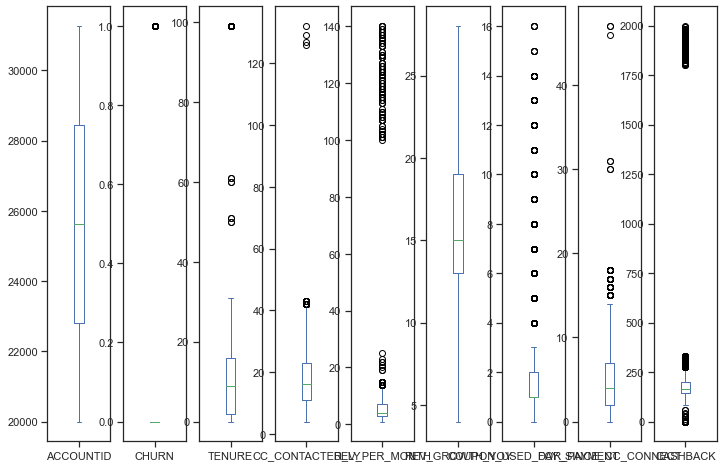

In [39]:
df.plot(kind = 'box', subplots = True, figsize=(12,8))
plt.tight_layout();

In [40]:
data_outlier = df.copy()

In [41]:
# Defining a funtion to remove outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [42]:
#capping and flooring of outliers with upper and lower bounds respectively
for column in data_outlier.drop(['ACCOUNTID','CHURN'],axis=1).columns:
    if data_outlier[column].dtype.name != 'category':
        lr,ur=remove_outlier(data_outlier[column])
        data_outlier[column]=np.where(data_outlier[column]>ur,ur,data_outlier[column])
        data_outlier[column]=np.where(data_outlier[column]<lr,lr,data_outlier[column])

In [43]:
outlier_check(data_outlier, 1.5)

ACCOUNTID
Number of outliers: 0
Percentage of outliers:     0.000 %

CHURN
Number of outliers: 1896
Percentage of outliers:    16.838 %

TENURE
Number of outliers: 0
Percentage of outliers:     0.000 %

CC_CONTACTED_LY
Number of outliers: 0
Percentage of outliers:     0.000 %

REV_PER_MONTH
Number of outliers: 0
Percentage of outliers:     0.000 %

REV_GROWTH_YOY
Number of outliers: 0
Percentage of outliers:     0.000 %

COUPON_USED_FOR_PAYMENT
Number of outliers: 0
Percentage of outliers:     0.000 %

DAY_SINCE_CC_CONNECT
Number of outliers: 0
Percentage of outliers:     0.000 %

CASHBACK
Number of outliers: 0
Percentage of outliers:     0.000 %



<AxesSubplot:>

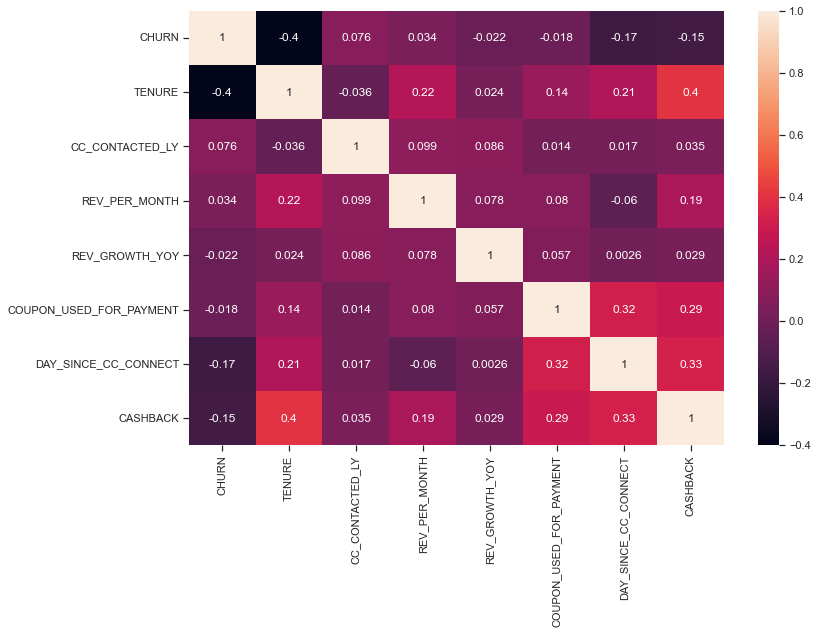

In [44]:
#checking correlation plot for multi collinearity check
plt.figure(figsize=(12,8))
sns.heatmap(data_outlier.drop(['ACCOUNTID'],axis=1).corr(method='spearman'),annot=True)

In [45]:
for col in data_outlier.columns:
    if data_outlier[col].isnull().sum()!=0:
        print(f"{col}: {data_outlier[col].isnull().sum()}: {round(data_outlier[col].isnull().mean()*100,2)}%")

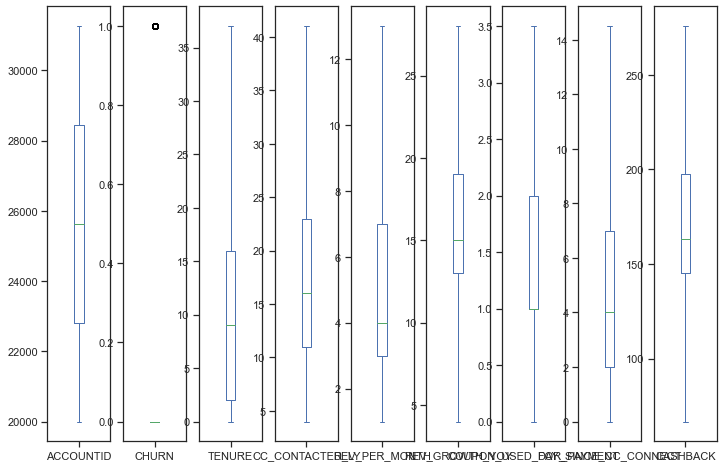

In [46]:
data_outlier.plot(kind = 'box', subplots = True, figsize=(12,8))
plt.tight_layout();

df_outlier_filtered = data_outlier.copy()

## Feature Analysis

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ACCOUNTID                11260 non-null  int64   
 1   CHURN                    11260 non-null  int64   
 2   TENURE                   11260 non-null  float64 
 3   CITY_TIER                11260 non-null  category
 4   CC_CONTACTED_LY          11260 non-null  float64 
 5   PAYMENT                  11260 non-null  category
 6   GENDER                   11260 non-null  category
 7   SERVICE_SCORE            11260 non-null  category
 8   ACCOUNT_USER_COUNT       11260 non-null  category
 9   ACCOUNT_SEGMENT          11260 non-null  category
 10  CC_AGENT_SCORE           11260 non-null  category
 11  MARITAL_STATUS           11260 non-null  category
 12  REV_PER_MONTH            11260 non-null  float64 
 13  COMPLAIN_LY              11260 non-null  category
 14  REV_GR

In [48]:
for col in df.columns:
    if(col not in ['ACCOUNTID']):
        print('=========',col,'===========')
        print(round(df[col].value_counts(1) * 100, 2))
        print('\n')

========= CHURN ===========
0    83.16
1    16.84
Name: CHURN, dtype: float64


========= TENURE ===========
1.0     13.03
0.0     10.93
8.0      4.61
9.0      4.40
11.0     4.35
7.0      4.00
10.0     3.76
3.0      3.64
5.0      3.58
4.0      3.58
6.0      3.22
12.0     3.20
13.0     3.19
2.0      3.14
14.0     3.06
15.0     2.76
16.0     2.58
19.0     2.42
18.0     2.25
20.0     1.93
17.0     1.91
21.0     1.51
23.0     1.50
22.0     1.34
24.0     1.31
28.0     1.22
30.0     1.22
99.0     1.16
27.0     1.16
26.0     1.08
25.0     1.01
29.0     1.01
31.0     0.85
50.0     0.02
60.0     0.02
51.0     0.02
61.0     0.02
Name: TENURE, dtype: float64


========= CITY_TIER ===========
1.0    65.50
3.0    30.24
2.0     4.26
Name: CITY_TIER, dtype: float64


========= CC_CONTACTED_LY ===========
14.0     6.06
16.0     5.89
9.0      5.82
13.0     5.82
15.0     5.53
12.0     5.07
8.0      4.78
17.0     4.66
11.0     4.65
10.0     4.34
18.0     4.23
7.0      3.47
19.0     3.23
20.0     2.83
6.0

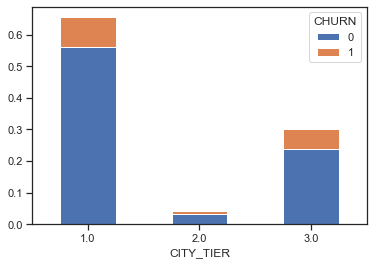

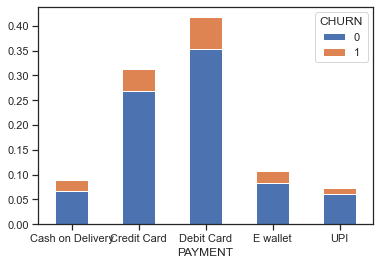

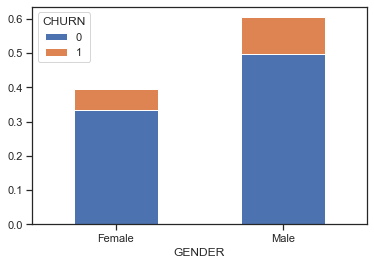

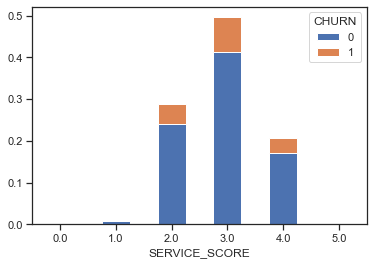

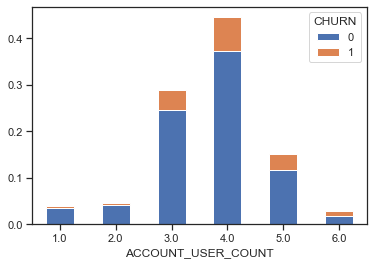

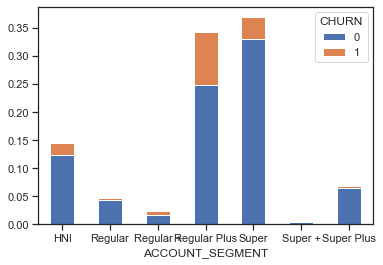

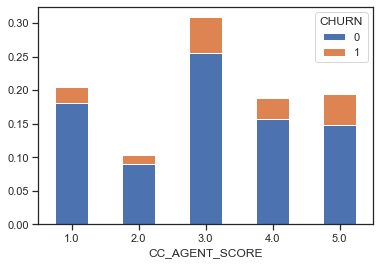

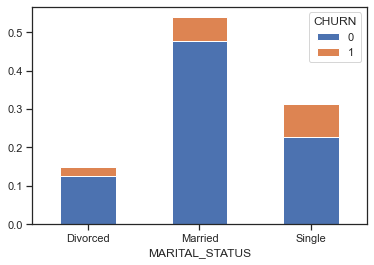

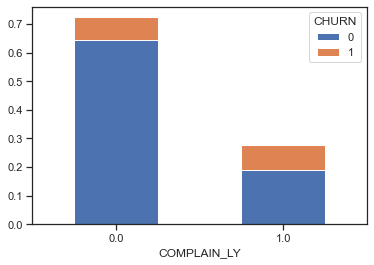

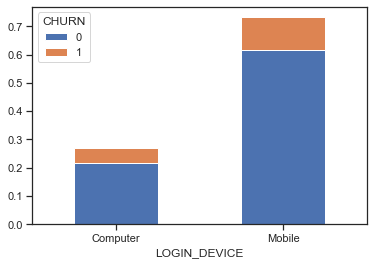

In [49]:
cols=['CITY_TIER', 'PAYMENT', 'GENDER', 'SERVICE_SCORE', 'ACCOUNT_USER_COUNT', 'ACCOUNT_SEGMENT', 'CC_AGENT_SCORE', 'MARITAL_STATUS', 'COMPLAIN_LY', 'LOGIN_DEVICE']

for col in cols:
    my_tab = pd.crosstab(df[col], df['CHURN'], normalize=True)
    my_tab.plot(kind='bar', stacked=True, rot=0)

## Encoding

In [50]:
df = pd.get_dummies(df, columns=['CITY_TIER', 'PAYMENT', 'GENDER', 'SERVICE_SCORE', 'ACCOUNT_USER_COUNT', 'ACCOUNT_SEGMENT', 'CC_AGENT_SCORE', 'MARITAL_STATUS', 'COMPLAIN_LY', 'LOGIN_DEVICE'], drop_first=True)
df.head()

,ACCOUNTID,CHURN,TENURE,CC_CONTACTED_LY,REV_PER_MONTH,REV_GROWTH_YOY,COUPON_USED_FOR_PAYMENT,DAY_SINCE_CC_CONNECT,CASHBACK,CITY_TIER_2.0,...,ACCOUNT_SEGMENT_Super +,ACCOUNT_SEGMENT_Super Plus,CC_AGENT_SCORE_2.0,CC_AGENT_SCORE_3.0,CC_AGENT_SCORE_4.0,CC_AGENT_SCORE_5.0,MARITAL_STATUS_Married,MARITAL_STATUS_Single,COMPLAIN_LY_1.0,LOGIN_DEVICE_Mobile
0,20000,1,4.0,6.0,9.0,11,1,5.0,159.93,0,...,0,0,1,0,0,0,0,1,1,1
1,20001,1,0.0,8.0,7.0,15,0,0.0,120.90,0,...,0,0,0,1,0,0,0,1,1,1
2,20002,1,0.0,30.0,6.0,14,0,3.0,0.00,0,...,0,0,0,1,0,0,0,1,1,1
3,20003,1,0.0,15.0,8.0,23,0,3.0,134.07,0,...,0,0,0,0,0,1,0,1,0,1
4,20004,1,0.0,12.0,3.0,11,1,3.0,129.60,0,...,0,0,0,0,0,1,0,1,0,1


In [51]:
df_outlier_filtered = pd.get_dummies(df_outlier_filtered, columns=['CITY_TIER', 'PAYMENT', 'GENDER', 'SERVICE_SCORE', 'ACCOUNT_USER_COUNT', 'ACCOUNT_SEGMENT', 'CC_AGENT_SCORE', 'MARITAL_STATUS', 'COMPLAIN_LY', 'LOGIN_DEVICE'], drop_first=True)
df_outlier_filtered.head()

,ACCOUNTID,CHURN,TENURE,CC_CONTACTED_LY,REV_PER_MONTH,REV_GROWTH_YOY,COUPON_USED_FOR_PAYMENT,DAY_SINCE_CC_CONNECT,CASHBACK,CITY_TIER_2.0,...,ACCOUNT_SEGMENT_Super +,ACCOUNT_SEGMENT_Super Plus,CC_AGENT_SCORE_2.0,CC_AGENT_SCORE_3.0,CC_AGENT_SCORE_4.0,CC_AGENT_SCORE_5.0,MARITAL_STATUS_Married,MARITAL_STATUS_Single,COMPLAIN_LY_1.0,LOGIN_DEVICE_Mobile
0,20000,1,4.0,6.0,9.0,11.0,1.0,5.0,159.930,0,...,0,0,1,0,0,0,0,1,1,1
1,20001,1,0.0,8.0,7.0,15.0,0.0,0.0,120.900,0,...,0,0,0,1,0,0,0,1,1,1
2,20002,1,0.0,30.0,6.0,14.0,0.0,3.0,66.735,0,...,0,0,0,1,0,0,0,1,1,1
3,20003,1,0.0,15.0,8.0,23.0,0.0,3.0,134.070,0,...,0,0,0,0,0,1,0,1,0,1
4,20004,1,0.0,12.0,3.0,11.0,1.0,3.0,129.600,0,...,0,0,0,0,0,1,0,1,0,1


# Model Building

## Train Test Split - Without Outlier Treatment

In [52]:
X = df.drop('CHURN', axis=1)

y= df['CHURN']

# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

##  Train Test Split - With Outlier Treatment

In [53]:
X_treated = df_outlier_filtered.drop('CHURN', axis=1)

y_treated= df_outlier_filtered['CHURN']

X_train_treated, X_test_treated, y_train_treated, y_test_treated = train_test_split(X_treated, y_treated, test_size=0.25 , random_state=1)

## Naive Bayes Model - With Outliers

In [54]:
from sklearn.metrics import plot_confusion_matrix,classification_report, plot_roc_curve,accuracy_score
def print_roc_auc(train_labels, X_train, alg):
    rf_fpr, rf_tpr,thresh=roc_curve(train_labels,alg.predict_proba(X_train)[:,1])
    plt.figure(figsize=(12,7))
    plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
    plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.show()
    print('Area under Curve is', roc_auc_score(train_labels,alg.predict_proba(X_train)[:,1]))
    
def print_roc_auc(model,X,y,preds):
    print('Accuracy Score: ',accuracy_score(y,preds))
    plot_roc_curve(model,X,y)
    plt.show();

0.7902901124925992 0.6265822784810127
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      7023
           1       0.42      0.63      0.50      1422

    accuracy                           0.79      8445
   macro avg       0.67      0.73      0.68      8445
weighted avg       0.83      0.79      0.81      8445

Accuracy Score:  0.7902901124925992


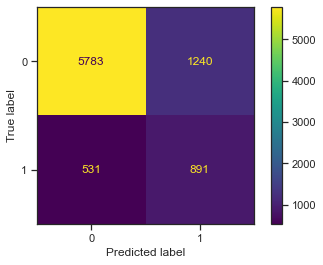

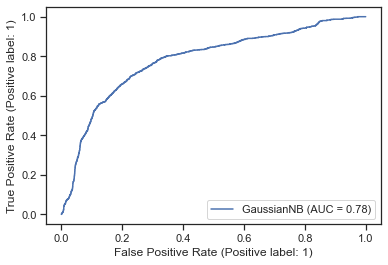

0.7957371225577264 0.5949367088607594
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      2341
           1       0.42      0.59      0.50       474

    accuracy                           0.80      2815
   macro avg       0.67      0.72      0.68      2815
weighted avg       0.83      0.80      0.81      2815

Accuracy Score:  0.7957371225577264


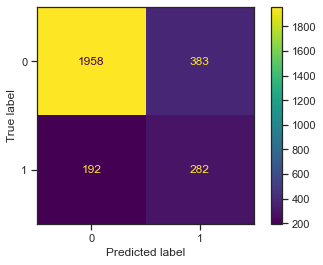

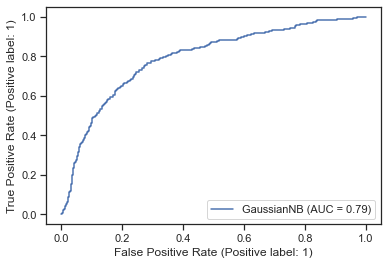

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix, classification_report, recall_score

NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

# Train Performance
## Performance Matrix on train data set
NB_train_predict = NB_model.predict(X_train)
NB_train_score = NB_model.score(X_train, y_train) # acc score
NB_train_recall_score = recall_score(y_train,NB_train_predict)
print(NB_train_score,NB_train_recall_score)

plot_confusion_matrix(NB_model,X_train,y_train);
plt.grid(b=False,axis='both');

print(classification_report(y_train, NB_train_predict))
print_roc_auc(NB_model, X_train, y_train, NB_train_predict)

# Test Performance
## Performance Matrix on test data set
NB_test_predict = NB_model.predict(X_test)
NB_test_score = NB_model.score(X_test, y_test)
NB_test_recall_score = recall_score(y_test,NB_test_predict)
print(NB_test_score,NB_test_recall_score)

plot_confusion_matrix(NB_model, X_test, y_test)
plt.grid(b=False);

print(classification_report(y_test, NB_test_predict))
print_roc_auc(NB_model, X_test, y_test, NB_test_predict)

## Naive Bayes Model - Without Outliers

0.7771462403789224 0.70042194092827
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      7023
           1       0.41      0.70      0.51      1422

    accuracy                           0.78      8445
   macro avg       0.67      0.75      0.68      8445
weighted avg       0.84      0.78      0.80      8445

Accuracy Score:  0.7771462403789224


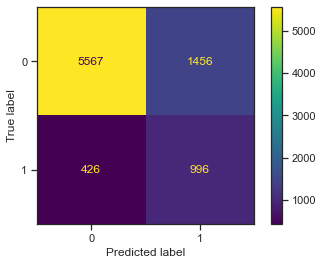

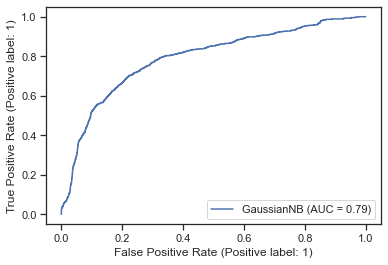

0.7825932504440497 0.7046413502109705
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      2341
           1       0.41      0.70      0.52       474

    accuracy                           0.78      2815
   macro avg       0.67      0.75      0.69      2815
weighted avg       0.84      0.78      0.80      2815

Accuracy Score:  0.7825932504440497


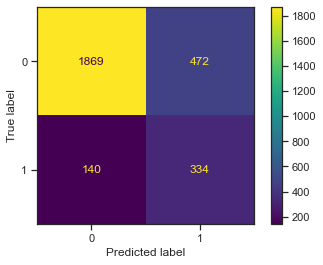

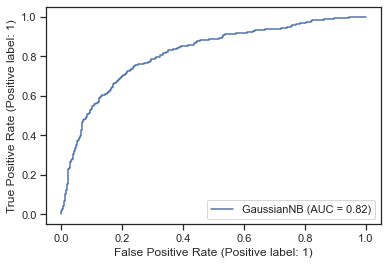

In [58]:
NB_model_treated = GaussianNB()
NB_model_treated.fit(X_train_treated, y_train_treated)

# Train Performance
## Performance Matrix on train data set
NB_train_predict_treated = NB_model_treated.predict(X_train_treated)
NB_train_score_treated = NB_model_treated.score(X_train_treated, y_train_treated) # acc score
NB_train_recall_score_treated = recall_score(y_train_treated,NB_train_predict_treated)
print(NB_train_score_treated,NB_train_recall_score_treated)

plot_confusion_matrix(NB_model_treated,X_train_treated,y_train_treated);
plt.grid(b=False,axis='both');

print(classification_report(y_train_treated, NB_train_predict_treated))
print_roc_auc(NB_model, X_train_treated, y_train_treated, NB_train_predict_treated)

# Test Performance
## Performance Matrix on test data set
NB_test_predict_treated = NB_model_treated.predict(X_test_treated)
NB_test_score_treated = NB_model_treated.score(X_test_treated, y_test_treated)
NB_test_recall_score_treated = recall_score(y_test_treated,NB_test_predict_treated)
print(NB_test_score_treated,NB_test_recall_score_treated)

plot_confusion_matrix(NB_model_treated, X_test_treated, y_test_treated)
plt.grid(b=False);

print(classification_report(y_test_treated, NB_test_predict_treated))
print_roc_auc(NB_model_treated, X_test_treated, y_test_treated, NB_test_predict_treated)

## Linear Discriminant Analysis - With Outliers

0.870574304322084 0.3959212376933896
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      7023
           1       0.71      0.40      0.51      1422

    accuracy                           0.87      8445
   macro avg       0.80      0.68      0.72      8445
weighted avg       0.86      0.87      0.86      8445

Accuracy Score:  0.870574304322084


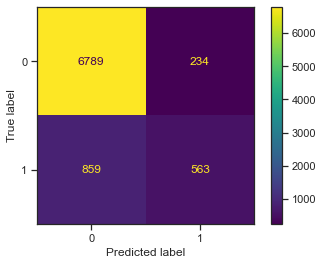

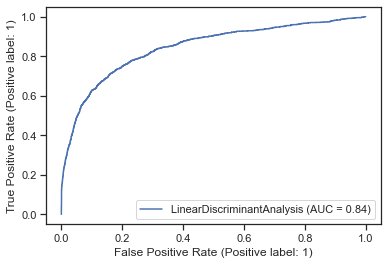

0.8635879218472469 0.34810126582278483
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2341
           1       0.69      0.35      0.46       474

    accuracy                           0.86      2815
   macro avg       0.78      0.66      0.69      2815
weighted avg       0.85      0.86      0.84      2815

Accuracy Score:  0.8635879218472469


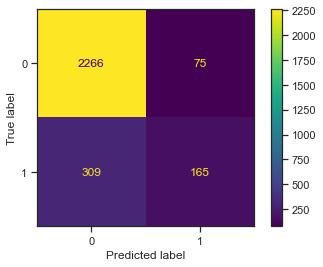

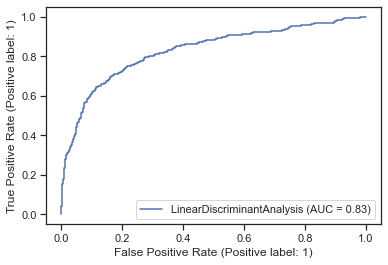

The coefficient for LOGIN_DEVICE_Mobile is -0.421
The coefficient for ACCOUNTID is -0.0
The coefficient for TENURE is -0.045
The coefficient for CC_CONTACTED_LY is 0.034
The coefficient for REV_PER_MONTH is 0.011
The coefficient for REV_GROWTH_YOY is -0.005
The coefficient for COUPON_USED_FOR_PAYMENT is 0.085
The coefficient for DAY_SINCE_CC_CONNECT is -0.074
The coefficient for CASHBACK is 0.0
The coefficient for CITY_TIER_2.0 is 0.445
The coefficient for CITY_TIER_3.0 is 0.806
The coefficient for PAYMENT_Credit Card is -0.979
The coefficient for PAYMENT_Debit Card is -0.792
The coefficient for PAYMENT_E wallet is -0.32
The coefficient for PAYMENT_UPI is -0.819
The coefficient for GENDER_Male is 0.233
The coefficient for SERVICE_SCORE_1.0 is 0.103
The coefficient for SERVICE_SCORE_2.0 is 1.283
The coefficient for SERVICE_SCORE_3.0 is 1.16
The coefficient for SERVICE_SCORE_4.0 is 1.076
The coefficient for SERVICE_SCORE_5.0 is -0.378
The coefficient for ACCOUNT_USER_COUNT_2.0 is 0.164
T

<AxesSubplot:title={'center':'Feature Importance'}>

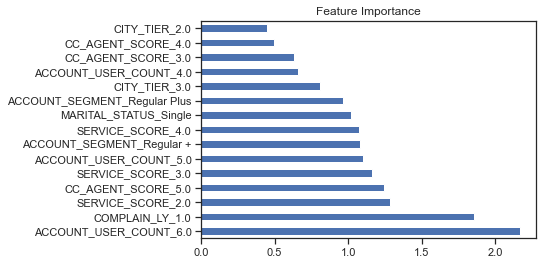

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

## Performance Matrix on train data set
LDA_train_predict = LDA_model.predict(X_train)
LDA_train_score = LDA_model.score(X_train, y_train)
LDA_train_recall_score = recall_score(y_train,LDA_train_predict)
print(LDA_train_score,LDA_train_recall_score)

plot_confusion_matrix(LDA_model,X_train,y_train)
plt.grid(b=False);

print(classification_report(y_train, LDA_train_predict))
print_roc_auc(LDA_model, X_train, y_train, LDA_train_predict)

## Performance Matrix on test data set
LDA_test_predict = LDA_model.predict(X_test)
LDA_test_score = LDA_model.score(X_test, y_test)
LDA_test_recall_score = recall_score(y_test,LDA_test_predict)
print(LDA_test_score,LDA_test_recall_score)

plot_confusion_matrix(LDA_model,X_test,y_test)
plt.grid(b=False);

print(classification_report(y_test, LDA_test_predict))
print_roc_auc(LDA_model, X_test, y_test, LDA_test_predict)

for i in range(len(LDA_model.feature_names_in_)):
    print("The coefficient for {} is {}".format(LDA_model.feature_names_in_[i-1],round(LDA_model.coef_[0][i-1], 3)))
    
feature_importance = pd.Series(LDA_model.coef_[0], index=LDA_model.feature_names_in_)
feature_importance.nlargest(15).plot(kind='barh', title="Feature Importance")

##  Linear Discriminant Analysis - Without Outliers

0.8875074008288928 0.48523206751054854
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7023
           1       0.76      0.49      0.59      1422

    accuracy                           0.89      8445
   macro avg       0.83      0.73      0.76      8445
weighted avg       0.88      0.89      0.88      8445

Accuracy Score:  0.8875074008288928


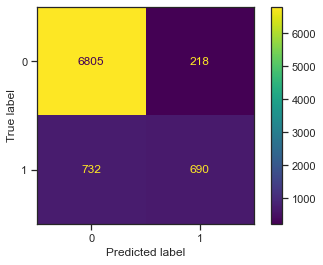

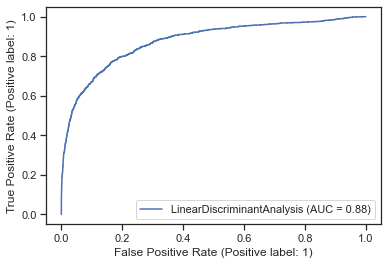

0.883126110124334 0.459915611814346
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2341
           1       0.75      0.46      0.57       474

    accuracy                           0.88      2815
   macro avg       0.82      0.71      0.75      2815
weighted avg       0.87      0.88      0.87      2815

Accuracy Score:  0.883126110124334


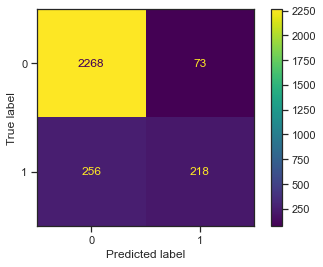

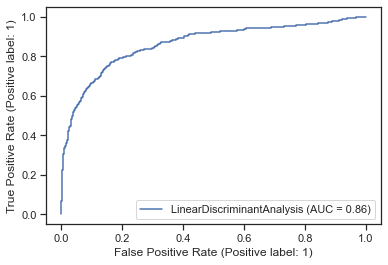

The coefficient for LOGIN_DEVICE_Mobile is -0.446
The coefficient for ACCOUNTID is -0.0
The coefficient for TENURE is -0.123
The coefficient for CC_CONTACTED_LY is 0.036
The coefficient for REV_PER_MONTH is 0.157
The coefficient for REV_GROWTH_YOY is 0.001
The coefficient for COUPON_USED_FOR_PAYMENT is 0.124
The coefficient for DAY_SINCE_CC_CONNECT is -0.07
The coefficient for CASHBACK is -0.002
The coefficient for CITY_TIER_2.0 is 0.554
The coefficient for CITY_TIER_3.0 is 0.716
The coefficient for PAYMENT_Credit Card is -1.073
The coefficient for PAYMENT_Debit Card is -0.844
The coefficient for PAYMENT_E wallet is -0.281
The coefficient for PAYMENT_UPI is -1.014
The coefficient for GENDER_Male is 0.231
The coefficient for SERVICE_SCORE_1.0 is 0.192
The coefficient for SERVICE_SCORE_2.0 is 1.22
The coefficient for SERVICE_SCORE_3.0 is 1.095
The coefficient for SERVICE_SCORE_4.0 is 1.032
The coefficient for SERVICE_SCORE_5.0 is -0.411
The coefficient for ACCOUNT_USER_COUNT_2.0 is 0.227

<AxesSubplot:title={'center':'Feature Importance'}>

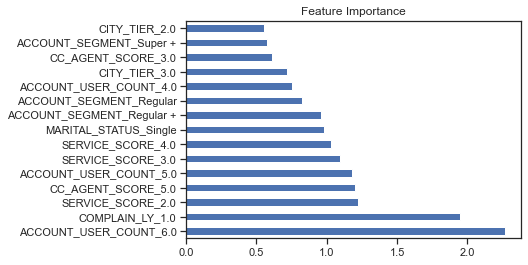

In [60]:
LDA_model_treated= LinearDiscriminantAnalysis()
LDA_model_treated.fit(X_train_treated, y_train_treated)

## Performance Matrix on train data set
LDA_train_predict_treated = LDA_model_treated.predict(X_train_treated)
LDA_train_score_treated = LDA_model_treated.score(X_train_treated, y_train_treated)
LDA_train_recall_score_treated = recall_score(y_train_treated,LDA_train_predict_treated)
print(LDA_train_score_treated,LDA_train_recall_score_treated)

plot_confusion_matrix(LDA_model_treated,X_train_treated,y_train_treated)
plt.grid(b=False);

print(classification_report(y_train_treated, LDA_train_predict_treated))
print_roc_auc(LDA_model_treated, X_train_treated, y_train_treated, LDA_train_predict_treated)

## Performance Matrix on test data set
LDA_test_predict_treated = LDA_model_treated.predict(X_test_treated)
LDA_test_score_treated = LDA_model_treated.score(X_test_treated, y_test_treated)
LDA_test_recall_score_treated = recall_score(y_test_treated,LDA_test_predict_treated)
print(LDA_test_score_treated,LDA_test_recall_score_treated)

plot_confusion_matrix(LDA_model_treated,X_test_treated,y_test_treated)
plt.grid(b=False);

print(classification_report(y_test_treated, LDA_test_predict_treated))
print_roc_auc(LDA_model_treated, X_test_treated, y_test_treated, LDA_test_predict_treated)

for i in range(len(LDA_model_treated.feature_names_in_)):
    print("The coefficient for {} is {}".format(LDA_model_treated.feature_names_in_[i-1],round(LDA_model_treated.coef_[0][i-1], 3)))
    
feature_importance = pd.Series(LDA_model_treated.coef_[0], index=LDA_model_treated.feature_names_in_)
feature_importance.nlargest(15).plot(kind='barh', title="Feature Importance")

## AdaBoost With Outliers

0.8998223801065719 0.5984528832630098
Train metrics
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7023
           1       0.76      0.60      0.67      1422

    accuracy                           0.90      8445
   macro avg       0.84      0.78      0.80      8445
weighted avg       0.89      0.90      0.90      8445

Accuracy Score:  0.8998223801065719


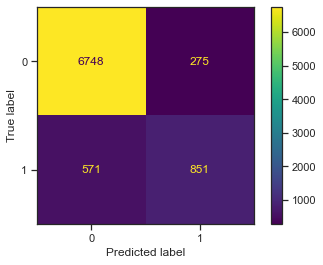

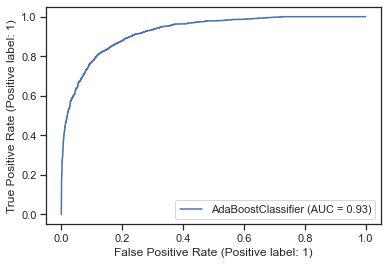

0.9015985790408526 0.5928270042194093
Test metrics
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2341
           1       0.77      0.59      0.67       474

    accuracy                           0.90      2815
   macro avg       0.85      0.78      0.81      2815
weighted avg       0.90      0.90      0.90      2815

Accuracy Score:  0.9015985790408526


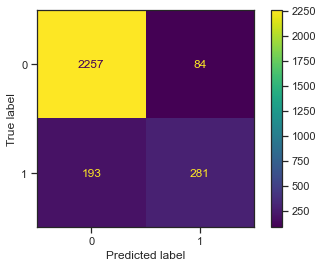

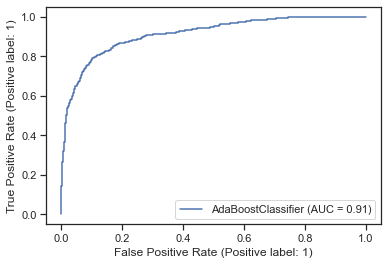

In [61]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

## Performance Matrix on train data set
ADB_train_predict = ADB_model.predict(X_train)
ADB_train_score = ADB_model.score(X_train, y_train)
ADB_train_recall_score = recall_score(y_train,ADB_train_predict)
print(ADB_train_score,ADB_train_recall_score)

plot_confusion_matrix(ADB_model,X_train,y_train);
plt.grid(b=False);

print('Train metrics')
print(classification_report(y_train, ADB_train_predict))
print_roc_auc(ADB_model, X_train, y_train, ADB_train_predict)


## Performance Matrix on test data set
ADB_test_predict = ADB_model.predict(X_test)
ADB_test_score = ADB_model.score(X_test, y_test)
ADB_test_recall_score = recall_score(y_test,ADB_test_predict)
print(ADB_test_score,ADB_test_recall_score)

plot_confusion_matrix(ADB_model,X_test,y_test)
plt.grid(b=False);

print('Test metrics')
print(classification_report(y_test, ADB_test_predict))
print_roc_auc(ADB_model, X_test, y_test, ADB_test_predict)

## AdaBoost Without Outliers

0.8995855535820012 0.5794655414908579
Train metrics
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7023
           1       0.77      0.58      0.66      1422

    accuracy                           0.90      8445
   macro avg       0.84      0.77      0.80      8445
weighted avg       0.89      0.90      0.89      8445

Accuracy Score:  0.8995855535820012


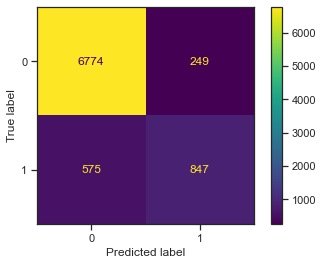

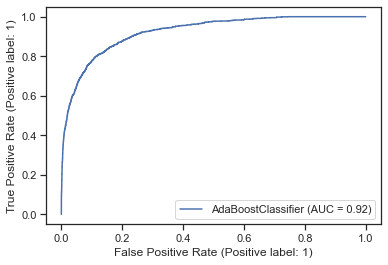

0.9058614564831261 0.5991561181434599
Test metrics
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2341
           1       0.79      0.60      0.68       474

    accuracy                           0.91      2815
   macro avg       0.86      0.78      0.81      2815
weighted avg       0.90      0.91      0.90      2815

Accuracy Score:  0.9058614564831261


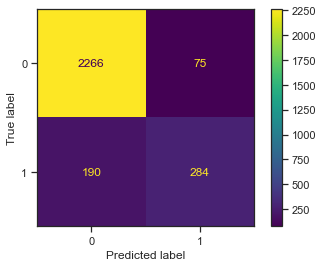

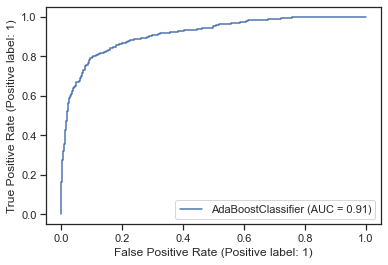

In [62]:
ADB_model_treated = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model_treated.fit(X_train_treated,y_train_treated)

## Performance Matrix on train data set
ADB_train_predict_treated = ADB_model.predict(X_train_treated)
ADB_train_score_treated = ADB_model.score(X_train_treated, y_train_treated)
ADB_train_recall_score_treated = recall_score(y_train_treated,ADB_train_predict_treated)
print(ADB_train_score_treated,ADB_train_recall_score_treated)

plot_confusion_matrix(ADB_model_treated,X_train_treated,y_train_treated);
plt.grid(b=False);

print('Train metrics')
print(classification_report(y_train_treated, ADB_train_predict_treated))
print_roc_auc(ADB_model_treated, X_train, y_train, ADB_train_predict_treated)


## Performance Matrix on test data set
ADB_test_predict_treated = ADB_model_treated.predict(X_test_treated)
ADB_test_score_treated = ADB_model_treated.score(X_test_treated, y_test_treated)
ADB_test_recall_score_treated = recall_score(y_test_treated,ADB_test_predict_treated)
print(ADB_test_score_treated,ADB_test_recall_score_treated)

plot_confusion_matrix(ADB_model_treated,X_test_treated,y_test_treated)
plt.grid(b=False);

print('Test metrics')
print(classification_report(y_test_treated, ADB_test_predict_treated))
print_roc_auc(ADB_model_treated, X_test_treated, y_test_treated, ADB_test_predict_treated)

## Gradient Boost With Outliers

0.9150976909413855 0.629395218002813
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7023
           1       0.82      0.63      0.71      1422

    accuracy                           0.92      8445
   macro avg       0.88      0.80      0.83      8445
weighted avg       0.91      0.92      0.91      8445

Accuracy Score:  0.9150976909413855


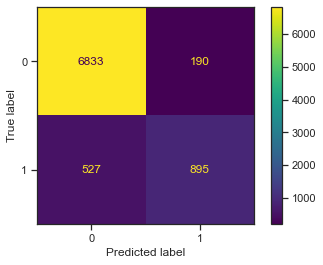

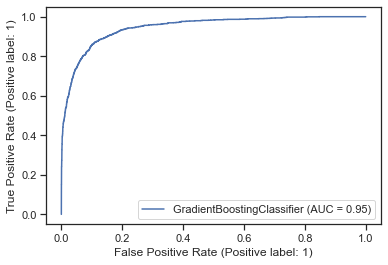

0.9104795737122557 0.6181434599156118
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2341
           1       0.80      0.62      0.70       474

    accuracy                           0.91      2815
   macro avg       0.87      0.79      0.82      2815
weighted avg       0.91      0.91      0.91      2815

Accuracy Score:  0.9104795737122557


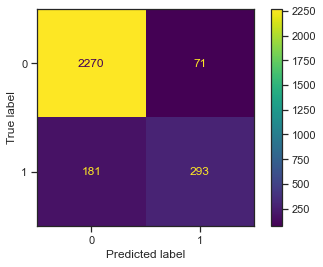

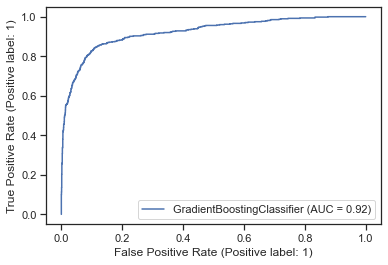

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)


gbcl = gbcl.fit(X_train, y_train)

## Performance Matrix on train data set
gbcl_train_predict = gbcl.predict(X_train)
gbcl_train_score = gbcl.score(X_train, y_train)
gbcl_train_recall_score = recall_score(y_train,gbcl_train_predict)
print(gbcl_train_score,gbcl_train_recall_score)

plot_confusion_matrix(gbcl,X_train,y_train)
plt.grid(b=False);

print(classification_report(y_train, gbcl_train_predict))
print_roc_auc(gbcl, X_train, y_train, gbcl_train_predict)

## Performance Matrix on test data set
gbcl_test_predict = gbcl.predict(X_test)
gbcl_test_score = gbcl.score(X_test, y_test)
gbcl_test_recall_score = recall_score(y_test, gbcl_test_predict)
print(gbcl_test_score,gbcl_test_recall_score)

plot_confusion_matrix(gbcl,X_test,y_test)
plt.grid(b=False);

print(classification_report(y_test, gbcl_test_predict))
print_roc_auc(gbcl, X_test, y_test, gbcl_test_predict)

## Gradient Boost Without Outliers

0.9153345174659562 0.6244725738396625
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7023
           1       0.83      0.62      0.71      1422

    accuracy                           0.92      8445
   macro avg       0.88      0.80      0.83      8445
weighted avg       0.91      0.92      0.91      8445

Accuracy Score:  0.9153345174659562


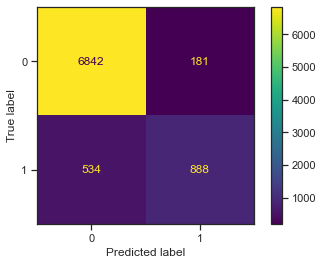

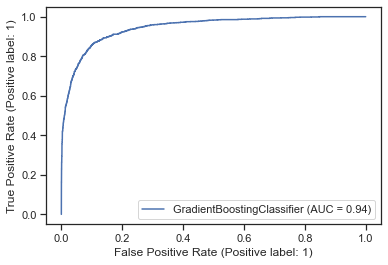

0.9108348134991119 0.620253164556962
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2341
           1       0.81      0.62      0.70       474

    accuracy                           0.91      2815
   macro avg       0.87      0.79      0.82      2815
weighted avg       0.91      0.91      0.91      2815

Accuracy Score:  0.9108348134991119


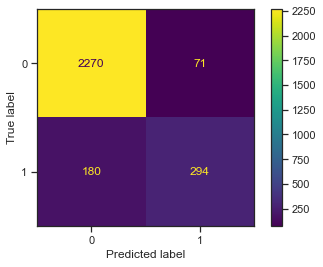

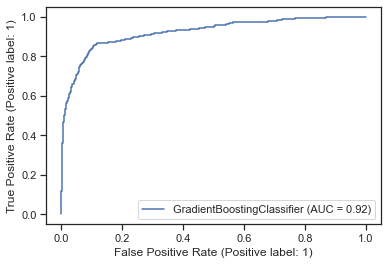

In [64]:
gbcl_treated = GradientBoostingClassifier(random_state=1)


gbcl_treated = gbcl_treated.fit(X_train_treated, y_train_treated)

## Performance Matrix on train data set
gbcl_train_predict_treated = gbcl_treated.predict(X_train_treated)
gbcl_train_score_treated = gbcl_treated.score(X_train_treated, y_train_treated)
gbcl_train_recall_score_treated = recall_score(y_train_treated,gbcl_train_predict_treated)
print(gbcl_train_score_treated,gbcl_train_recall_score_treated)

plot_confusion_matrix(gbcl_treated,X_train_treated,y_train_treated)
plt.grid(b=False);

print(classification_report(y_train_treated, gbcl_train_predict_treated))
print_roc_auc(gbcl_treated, X_train_treated, y_train_treated, gbcl_train_predict_treated)

## Performance Matrix on test data set
gbcl_test_predict_treated = gbcl_treated.predict(X_test_treated)
gbcl_test_score_treated = gbcl_treated.score(X_test_treated, y_test_treated)
gbcl_test_recall_score_treated = recall_score(y_test_treated, gbcl_test_predict_treated)
print(gbcl_test_score_treated,gbcl_test_recall_score_treated)

plot_confusion_matrix(gbcl_treated,X_test_treated,y_test_treated)
plt.grid(b=False);

print(classification_report(y_test_treated, gbcl_test_predict_treated))
print_roc_auc(gbcl_treated, X_test_treated, y_test_treated, gbcl_test_predict_treated)

## KNN With Outliers

0.8487862640615749 0.18354430379746836
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      7023
           1       0.69      0.18      0.29      1422

    accuracy                           0.85      8445
   macro avg       0.77      0.58      0.60      8445
weighted avg       0.83      0.85      0.81      8445

Accuracy Score:  0.8487862640615749


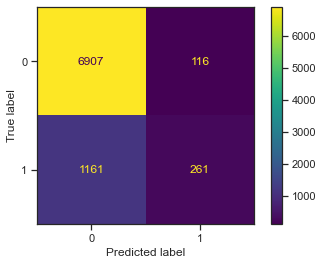

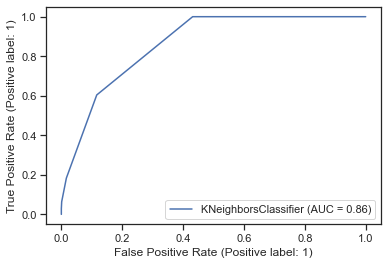

0.8191829484902309 0.06540084388185655
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2341
           1       0.32      0.07      0.11       474

    accuracy                           0.82      2815
   macro avg       0.58      0.52      0.50      2815
weighted avg       0.75      0.82      0.77      2815

Accuracy Score:  0.8191829484902309


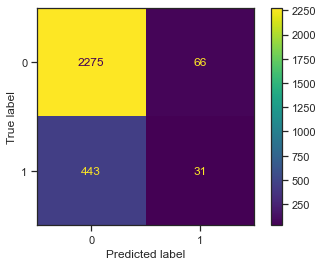

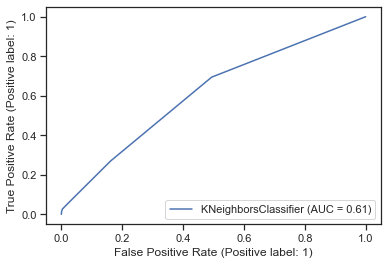

In [65]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

## Performance Matrix on train data set
KNN_train_predict = KNN_model.predict(X_train)
KNN_train_score = KNN_model.score(X_train, y_train)
KNN_train_recall_score = recall_score(y_train,KNN_train_predict)
print(KNN_train_score,KNN_train_recall_score)

plot_confusion_matrix(KNN_model,X_train,y_train)
plt.grid(b=False);

print(classification_report(y_train, KNN_train_predict))
print_roc_auc(KNN_model, X_train, y_train, KNN_train_predict)

## Performance Matrix on test data set
KNN_test_predict = KNN_model.predict(X_test)
KNN_test_score = KNN_model.score(X_test, y_test)
KNN_test_recall_score = recall_score(y_test,KNN_test_predict)
print(KNN_test_score,KNN_test_recall_score)

plot_confusion_matrix(KNN_model,X_test, y_test)
plt.grid(b=False);

print(classification_report(y_test, KNN_test_predict))
print_roc_auc(KNN_model, X_test, y_test, KNN_test_predict)

## KNN Without Outliers

0.850088809946714 0.19057665260196907
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      7023
           1       0.70      0.19      0.30      1422

    accuracy                           0.85      8445
   macro avg       0.78      0.59      0.61      8445
weighted avg       0.83      0.85      0.81      8445

Accuracy Score:  0.850088809946714


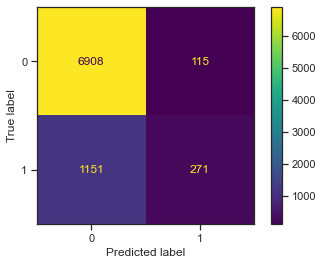

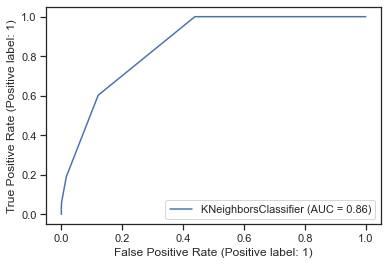

0.819538188277087 0.06540084388185655
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2341
           1       0.32      0.07      0.11       474

    accuracy                           0.82      2815
   macro avg       0.58      0.52      0.50      2815
weighted avg       0.75      0.82      0.77      2815

Accuracy Score:  0.819538188277087


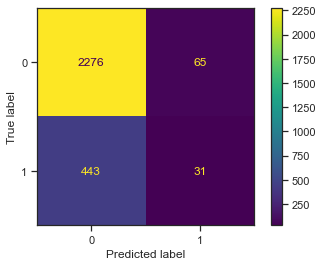

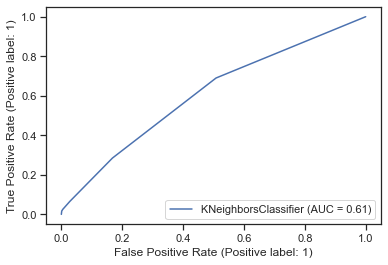

In [66]:
KNN_model_treated=KNeighborsClassifier()
KNN_model_treated.fit(X_train_treated,y_train_treated)

## Performance Matrix on train data set
KNN_train_predict_treated = KNN_model_treated.predict(X_train_treated)
KNN_train_score_treated = KNN_model_treated.score(X_train_treated, y_train_treated)
KNN_train_recall_score_treated = recall_score(y_train_treated,KNN_train_predict_treated)
print(KNN_train_score_treated,KNN_train_recall_score_treated)

plot_confusion_matrix(KNN_model_treated,X_train_treated,y_train_treated)
plt.grid(b=False);

print(classification_report(y_train_treated, KNN_train_predict_treated))
print_roc_auc(KNN_model_treated, X_train_treated, y_train_treated, KNN_train_predict_treated)

## Performance Matrix on test data set
KNN_test_predict_treated = KNN_model_treated.predict(X_test_treated)
KNN_test_score_treated = KNN_model_treated.score(X_test_treated, y_test_treated)
KNN_test_recall_score_treated = recall_score(y_test_treated,KNN_test_predict_treated)
print(KNN_test_score_treated,KNN_test_recall_score_treated)

plot_confusion_matrix(KNN_model_treated,X_test_treated, y_test_treated)
plt.grid(b=False);

print(classification_report(y_test_treated, KNN_test_predict_treated))
print_roc_auc(KNN_model_treated, X_test_treated, y_test_treated, KNN_test_predict_treated)

## Decision Tree With Outliers

1.0 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7023
           1       1.00      1.00      1.00      1422

    accuracy                           1.00      8445
   macro avg       1.00      1.00      1.00      8445
weighted avg       1.00      1.00      1.00      8445

Accuracy Score:  1.0


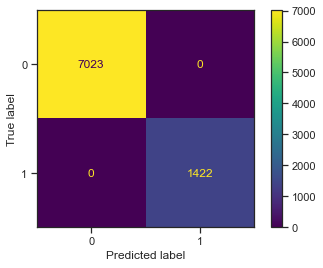

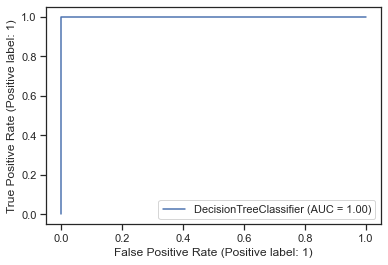

0.9293072824156305 0.7911392405063291
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2341
           1       0.79      0.79      0.79       474

    accuracy                           0.93      2815
   macro avg       0.87      0.87      0.87      2815
weighted avg       0.93      0.93      0.93      2815

Accuracy Score:  0.9293072824156305


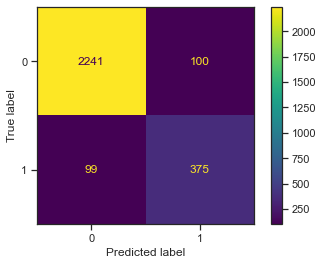

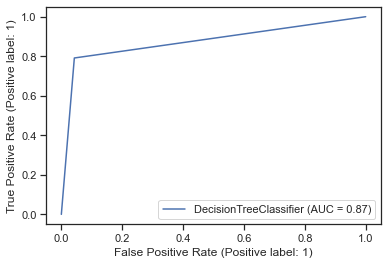

In [67]:
from sklearn import tree

DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

## Performance Matrix on train data set
DT_train_predict = DT_model.predict(X_train)
DT_train_score = DT_model.score(X_train, y_train)
DT_train_recall_score = recall_score(y_train,DT_train_predict)
print(DT_train_score,DT_train_recall_score)

plot_confusion_matrix(DT_model,X_train,y_train)
plt.grid(b=False);

print(classification_report(y_train, DT_train_predict))
print_roc_auc(DT_model, X_train, y_train, DT_train_predict)

## Performance Matrix on test data set
DT_test_predict = DT_model.predict(X_test)
DT_test_score = DT_model.score(X_test, y_test)
DT_test_recall_score = recall_score(y_test, DT_test_predict)
print(DT_test_score,DT_test_recall_score)

plot_confusion_matrix(DT_model, X_test, y_test)
plt.grid(b=False);

print(classification_report(y_test, DT_test_predict))
print_roc_auc(DT_model, X_test, y_test, DT_test_predict)

## Decision Tree Without Outliers

1.0 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7023
           1       1.00      1.00      1.00      1422

    accuracy                           1.00      8445
   macro avg       1.00      1.00      1.00      8445
weighted avg       1.00      1.00      1.00      8445

Accuracy Score:  1.0


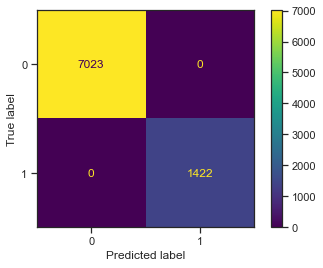

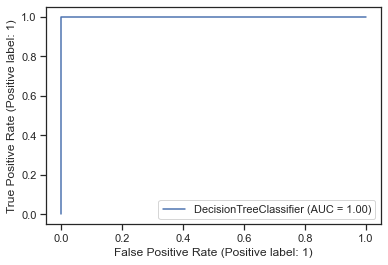

0.9296625222024867 0.7784810126582279
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2341
           1       0.80      0.78      0.79       474

    accuracy                           0.93      2815
   macro avg       0.88      0.87      0.87      2815
weighted avg       0.93      0.93      0.93      2815

Accuracy Score:  0.9296625222024867


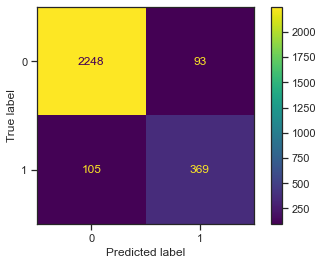

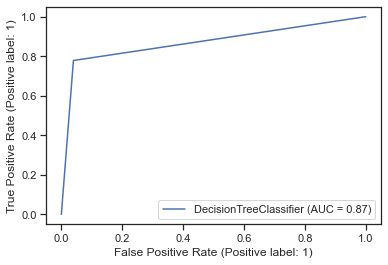

In [68]:
DT_model_treated= tree.DecisionTreeClassifier()
DT_model_treated.fit(X_train_treated, y_train_treated)

## Performance Matrix on train data set
DT_train_predict_treated = DT_model_treated.predict(X_train_treated)
DT_train_score_treated = DT_model_treated.score(X_train_treated, y_train_treated)
DT_train_recall_score_treated = recall_score(y_train_treated,DT_train_predict_treated)
print(DT_train_score_treated,DT_train_recall_score_treated)

plot_confusion_matrix(DT_model_treated,X_train_treated,y_train_treated)
plt.grid(b=False);

print(classification_report(y_train_treated, DT_train_predict_treated))
print_roc_auc(DT_model_treated, X_train_treated, y_train_treated, DT_train_predict_treated)

## Performance Matrix on test data set
DT_test_predict_treated = DT_model_treated.predict(X_test_treated)
DT_test_score_treated = DT_model_treated.score(X_test_treated, y_test_treated)
DT_test_recall_score_treated = recall_score(y_test_treated, DT_test_predict_treated)
print(DT_test_score_treated,DT_test_recall_score_treated)

plot_confusion_matrix(DT_model_treated, X_test_treated, y_test_treated)
plt.grid(b=False);

print(classification_report(y_test_treated, DT_test_predict_treated))
print_roc_auc(DT_model_treated, X_test_treated, y_test_treated, DT_test_predict_treated)

## Random Forest With Outliers

1.0 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7023
           1       1.00      1.00      1.00      1422

    accuracy                           1.00      8445
   macro avg       1.00      1.00      1.00      8445
weighted avg       1.00      1.00      1.00      8445

Accuracy Score:  1.0


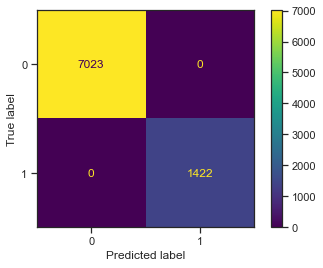

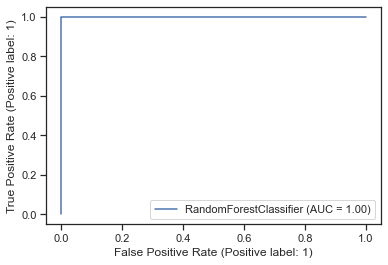

0.9651865008880994 0.8037974683544303
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2341
           1       0.99      0.80      0.89       474

    accuracy                           0.97      2815
   macro avg       0.97      0.90      0.93      2815
weighted avg       0.97      0.97      0.96      2815

Accuracy Score:  0.9651865008880994


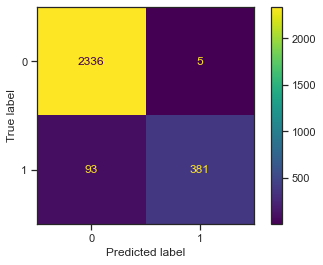

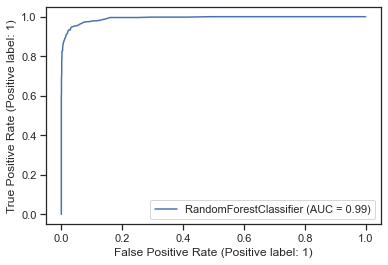

<AxesSubplot:>

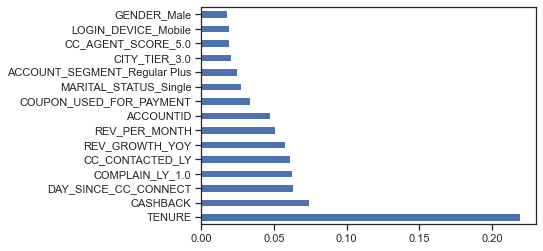

In [69]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

## Performance Matrix on train data set
RF_train_predict = RF_model.predict(X_train)
RF_train_score =RF_model.score(X_train, y_train)
RF_train_recall_score = recall_score(y_train,RF_train_predict)
print(RF_train_score,RF_train_recall_score)

plot_confusion_matrix(RF_model, X_train,y_train)
plt.grid(b=False);

print(classification_report(y_train, RF_train_predict))
print_roc_auc(RF_model, X_train, y_train, RF_train_predict)


## Performance Matrix on test data set
RF_test_predict = RF_model.predict(X_test)
RF_test_score = RF_model.score(X_test, y_test)
RF_test_recall_score = recall_score(y_test, RF_test_predict)
print(RF_test_score,RF_test_recall_score)

plot_confusion_matrix(RF_model,X_test,y_test)
plt.grid(b=False);

print(classification_report(y_test, RF_test_predict))
print_roc_auc(RF_model, X_test, y_test, RF_test_predict)

feature_importance = pd.Series(RF_model.feature_importances_, index=RF_model.feature_names_in_)
feature_importance.nlargest(15).plot(kind='barh')

## Random Forest Without Outliers

1.0 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7023
           1       1.00      1.00      1.00      1422

    accuracy                           1.00      8445
   macro avg       1.00      1.00      1.00      8445
weighted avg       1.00      1.00      1.00      8445

Accuracy Score:  1.0


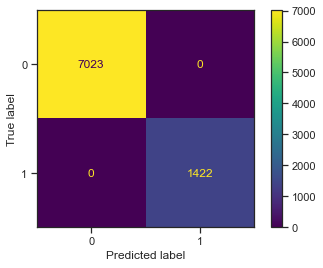

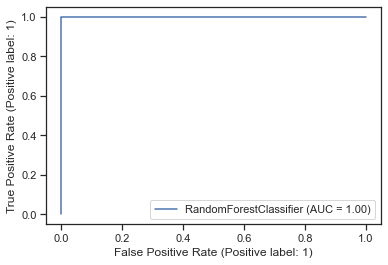

0.9626998223801065 0.7890295358649789
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2341
           1       0.99      0.79      0.88       474

    accuracy                           0.96      2815
   macro avg       0.97      0.89      0.93      2815
weighted avg       0.96      0.96      0.96      2815

Accuracy Score:  0.9626998223801065


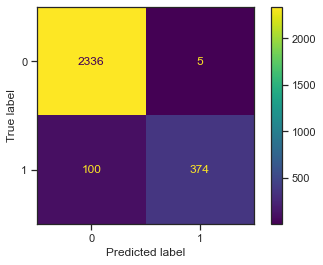

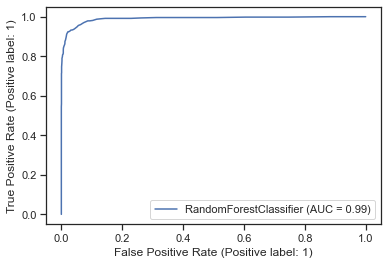

<AxesSubplot:>

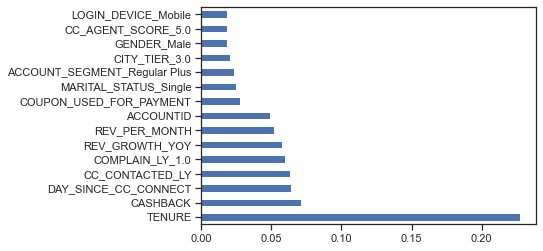

In [70]:
RF_model_treated=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model_treated.fit(X_train_treated, y_train_treated)

## Performance Matrix on train data set
RF_train_predict_treated = RF_model_treated.predict(X_train_treated)
RF_train_score_treated =RF_model_treated.score(X_train_treated, y_train_treated)
RF_train_recall_score_treated = recall_score(y_train_treated,RF_train_predict_treated)
print(RF_train_score_treated,RF_train_recall_score_treated)

plot_confusion_matrix(RF_model_treated, X_train_treated,y_train_treated)
plt.grid(b=False);

print(classification_report(y_train_treated, RF_train_predict_treated))
print_roc_auc(RF_model_treated, X_train_treated, y_train_treated, RF_train_predict_treated)

## Performance Matrix on test data set
RF_test_predict_treated = RF_model_treated.predict(X_test_treated)
RF_test_score_treated = RF_model_treated.score(X_test_treated, y_test_treated)
RF_test_recall_score_treated = recall_score(y_test_treated, RF_test_predict_treated)
print(RF_test_score_treated,RF_test_recall_score_treated)

plot_confusion_matrix(RF_model_treated,X_test_treated,y_test_treated)
plt.grid(b=False);

print(classification_report(y_test_treated, RF_test_predict_treated))
print_roc_auc(RF_model_treated, X_test_treated, y_test_treated, RF_test_predict_treated)

feature_importance = pd.Series(RF_model_treated.feature_importances_, index=RF_model_treated.feature_names_in_)
feature_importance.nlargest(15).plot(kind='barh')

## Bagging With Outliers

1.0 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7023
           1       1.00      1.00      1.00      1422

    accuracy                           1.00      8445
   macro avg       1.00      1.00      1.00      8445
weighted avg       1.00      1.00      1.00      8445

Accuracy Score:  1.0


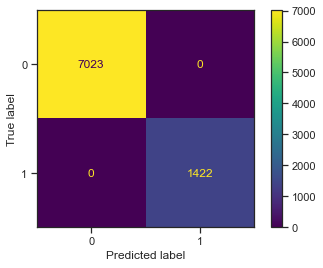

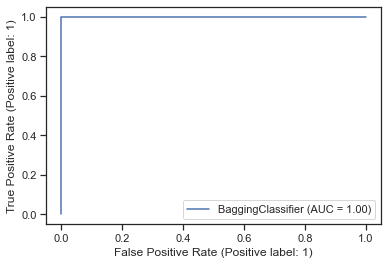

0.9641207815275311 0.8312236286919831
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2341
           1       0.95      0.83      0.89       474

    accuracy                           0.96      2815
   macro avg       0.96      0.91      0.93      2815
weighted avg       0.96      0.96      0.96      2815

Accuracy Score:  0.9641207815275311


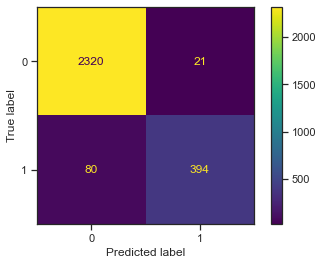

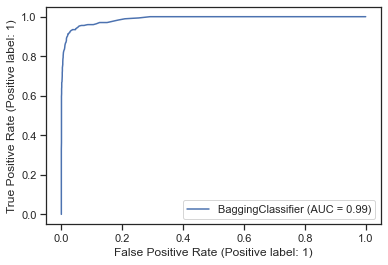

In [71]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,
                                n_estimators=100,
                                random_state=1)
Bagging_model.fit(X_train, y_train)

## Performance Matrix on train data set
Bagging_train_predict = Bagging_model.predict(X_train)
Bagging_train_score =Bagging_model.score(X_train, y_train)
Bagging_train_recall_score = recall_score(y_train,Bagging_train_predict)
print(Bagging_train_score, Bagging_train_recall_score)

plot_confusion_matrix(Bagging_model,X_train, y_train)
plt.grid(b=False);

print(classification_report(y_train, Bagging_train_predict))
print_roc_auc(Bagging_model, X_train, y_train, Bagging_train_predict)

## Performance Matrix on test data set
Bagging_test_predict = Bagging_model.predict(X_test)
Bagging_test_score = Bagging_model.score(X_test, y_test)
Bagging_test_recall_score = recall_score(y_test, Bagging_test_predict)
print(Bagging_test_score, Bagging_test_recall_score)

plot_confusion_matrix(Bagging_model,X_test,y_test)
plt.grid(b=False);

print(classification_report(y_test, Bagging_test_predict))
print_roc_auc(Bagging_model, X_test, y_test, Bagging_test_predict)

## Bagging Without Outliers

1.0 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7023
           1       1.00      1.00      1.00      1422

    accuracy                           1.00      8445
   macro avg       1.00      1.00      1.00      8445
weighted avg       1.00      1.00      1.00      8445

Accuracy Score:  1.0


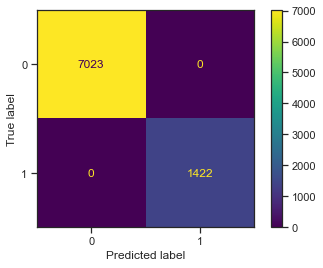

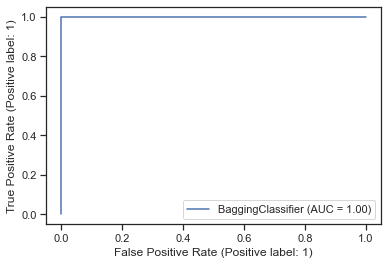

0.9641207815275311 0.8291139240506329
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2341
           1       0.95      0.83      0.89       474

    accuracy                           0.96      2815
   macro avg       0.96      0.91      0.93      2815
weighted avg       0.96      0.96      0.96      2815

Accuracy Score:  0.9641207815275311


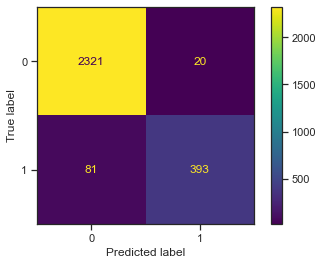

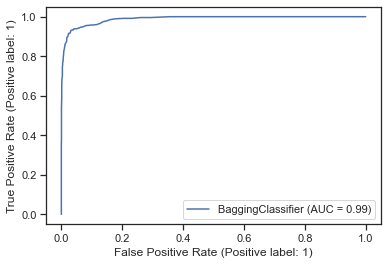

In [72]:
cart_treated = DecisionTreeClassifier()
Bagging_model_treated=BaggingClassifier(base_estimator=cart_treated,
                                n_estimators=100,
                                random_state=1)
Bagging_model_treated.fit(X_train_treated, y_train_treated)

## Performance Matrix on train data set
Bagging_train_predict_treated = Bagging_model_treated.predict(X_train_treated)
Bagging_train_score_treated =Bagging_model_treated.score(X_train_treated, y_train_treated)
Bagging_train_recall_score_treated = recall_score(y_train_treated,Bagging_train_predict_treated)
print(Bagging_train_score_treated, Bagging_train_recall_score_treated)

plot_confusion_matrix(Bagging_model_treated,X_train_treated, y_train_treated)
plt.grid(b=False);

print(classification_report(y_train_treated, Bagging_train_predict_treated))
print_roc_auc(Bagging_model_treated, X_train_treated, y_train_treated, Bagging_train_predict_treated)

## Performance Matrix on test data set
Bagging_test_predict_treated = Bagging_model_treated.predict(X_test_treated)
Bagging_test_score_treated = Bagging_model_treated.score(X_test_treated, y_test_treated)
Bagging_test_recall_score_treated = recall_score(y_test_treated, Bagging_test_predict_treated)
print(Bagging_test_score_treated, Bagging_test_recall_score_treated)

plot_confusion_matrix(Bagging_model_treated,X_test_treated,y_test_treated)
plt.grid(b=False);

print(classification_report(y_test_treated, Bagging_test_predict_treated))
print_roc_auc(Bagging_model_treated, X_test_treated, y_test_treated, Bagging_test_predict_treated)

## Logistic Regression - With Outliers

In [73]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression

grid={'penalty':['l2','none','l1','elasticnet'],
      'solver':['sag','lbfgs','saga','newton-cg','liblinear'],
      'tol':[0.1, 0.01, 0.001], # 0.1, 0.01,0.001,
     'l1_ratio':[0.25,0.5,0.75]} #'max_iter':[100,1000,10000]

model = LogisticRegression(max_iter=10000,n_jobs=2,random_state=1)

grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

grid_search.fit(X_train, y_train)

print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)



{'l1_ratio': 0.25, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.1} 

LogisticRegression(l1_ratio=0.25, max_iter=10000, n_jobs=2, random_state=1,
                   solver='newton-cg', tol=0.1)


              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7023
           1       0.78      0.44      0.56      1422

    accuracy                           0.88      8445
   macro avg       0.84      0.71      0.75      8445
weighted avg       0.88      0.88      0.87      8445
 

Accuracy Score:  0.8843102427471877


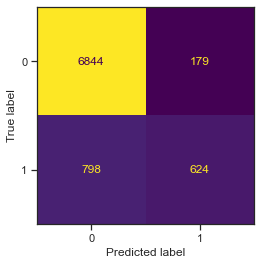

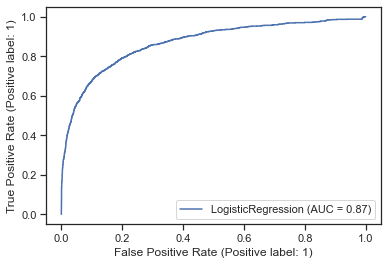

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2341
           1       0.74      0.40      0.52       474

    accuracy                           0.88      2815
   macro avg       0.81      0.69      0.73      2815
weighted avg       0.86      0.88      0.86      2815
 

Accuracy Score:  0.8756660746003553


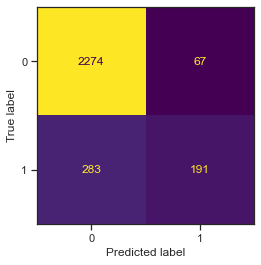

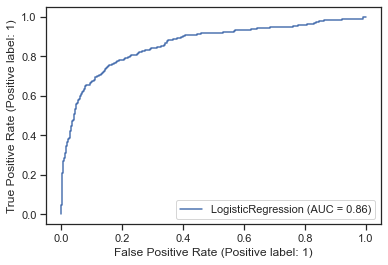

The coefficient for LOGIN_DEVICE_Mobile is -0.386
The coefficient for ACCOUNTID is -0.0
The coefficient for TENURE is -0.113
The coefficient for CC_CONTACTED_LY is 0.034
The coefficient for REV_PER_MONTH is 0.011
The coefficient for REV_GROWTH_YOY is -0.01
The coefficient for COUPON_USED_FOR_PAYMENT is 0.125
The coefficient for DAY_SINCE_CC_CONNECT is -0.084
The coefficient for CASHBACK is 0.0
The coefficient for CITY_TIER_2.0 is 0.66
The coefficient for CITY_TIER_3.0 is 0.704
The coefficient for PAYMENT_Credit Card is -0.723
The coefficient for PAYMENT_Debit Card is -0.563
The coefficient for PAYMENT_E wallet is -0.021
The coefficient for PAYMENT_UPI is -0.7
The coefficient for GENDER_Male is 0.256
The coefficient for SERVICE_SCORE_1.0 is -1.186
The coefficient for SERVICE_SCORE_2.0 is 0.552
The coefficient for SERVICE_SCORE_3.0 is 0.49
The coefficient for SERVICE_SCORE_4.0 is 0.457
The coefficient for SERVICE_SCORE_5.0 is -0.255
The coefficient for ACCOUNT_USER_COUNT_2.0 is 0.017
The

<AxesSubplot:title={'center':'Feature Importance'}>

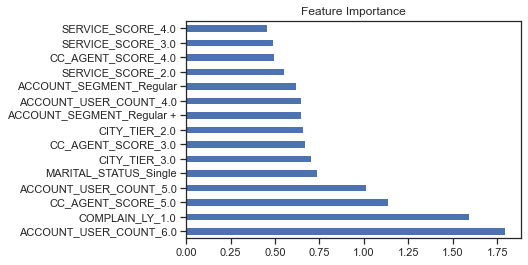

In [74]:
best_model = LogisticRegression(max_iter=10000,n_jobs=2,random_state=1,
                               l1_ratio=0.25,penalty='l2',
                               solver='newton-cg', tol=0.1)

best_model.fit(X_train,y_train)


ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

## Confusion matrix on the training data
plot_confusion_matrix(best_model,X_train,y_train, colorbar=False)
print(classification_report(y_train, ytrain_predict),'\n')
print_roc_auc(best_model, X_train, y_train, ytrain_predict)

## Confusion matrix on the test data
plot_confusion_matrix(best_model,X_test,y_test, colorbar=False)
print(classification_report(y_test, ytest_predict),'\n');
print_roc_auc(best_model, X_test, y_test, ytest_predict)

for i in range(len(best_model.feature_names_in_)):
    print("The coefficient for {} is {}".format(best_model.feature_names_in_[i-1],round(best_model.coef_[0][i-1], 3)))

feature_importance = pd.Series(best_model.coef_[0], index=best_model.feature_names_in_)
feature_importance.nlargest(15).plot(kind='barh', title="Feature Importance")    
    

## Logistic Regression - Without Outliers

In [75]:
grid_search.fit(X_train_treated, y_train_treated)

print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'l1_ratio': 0.25, 'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.1} 

LogisticRegression(l1_ratio=0.25, max_iter=10000, n_jobs=2, penalty='none',
                   random_state=1, solver='newton-cg', tol=0.1)


              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7023
           1       0.78      0.51      0.62      1422

    accuracy                           0.89      8445
   macro avg       0.84      0.74      0.78      8445
weighted avg       0.89      0.89      0.88      8445
 

Accuracy Score:  0.8934280639431617


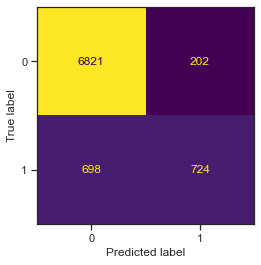

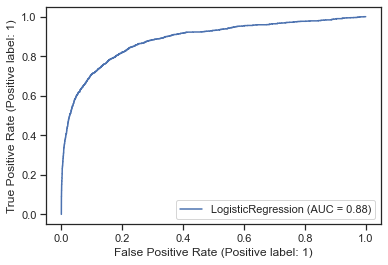

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2341
           1       0.78      0.49      0.60       474

    accuracy                           0.89      2815
   macro avg       0.84      0.73      0.77      2815
weighted avg       0.88      0.89      0.88      2815
 

Accuracy Score:  0.8912966252220249


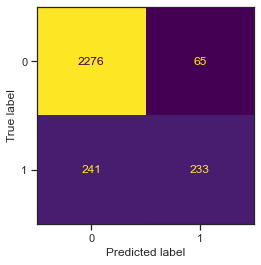

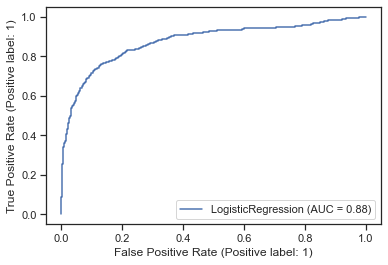

The coefficient for LOGIN_DEVICE_Mobile is -0.43
The coefficient for ACCOUNTID is -0.0
The coefficient for TENURE is -0.177
The coefficient for CC_CONTACTED_LY is 0.037
The coefficient for REV_PER_MONTH is 0.177
The coefficient for REV_GROWTH_YOY is -0.009
The coefficient for COUPON_USED_FOR_PAYMENT is 0.2
The coefficient for DAY_SINCE_CC_CONNECT is -0.073
The coefficient for CASHBACK is -0.002
The coefficient for CITY_TIER_2.0 is 0.812
The coefficient for CITY_TIER_3.0 is 0.714
The coefficient for PAYMENT_Credit Card is -0.769
The coefficient for PAYMENT_Debit Card is -0.557
The coefficient for PAYMENT_E wallet is 0.049
The coefficient for PAYMENT_UPI is -0.805
The coefficient for GENDER_Male is 0.275
The coefficient for SERVICE_SCORE_1.0 is -1.022
The coefficient for SERVICE_SCORE_2.0 is 0.498
The coefficient for SERVICE_SCORE_3.0 is 0.424
The coefficient for SERVICE_SCORE_4.0 is 0.435
The coefficient for SERVICE_SCORE_5.0 is -0.276
The coefficient for ACCOUNT_USER_COUNT_2.0 is -0.00

<AxesSubplot:title={'center':'Feature Importance'}>

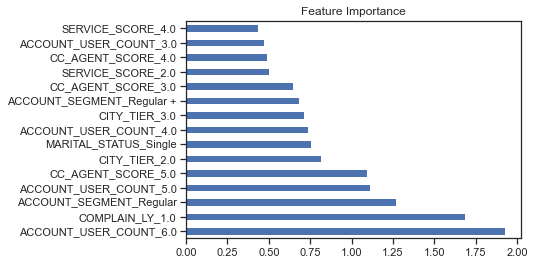

In [76]:
best_model = LogisticRegression(max_iter=10000,n_jobs=2,random_state=1,
                               l1_ratio=0.25,penalty='l2',
                               solver='newton-cg', tol=0.1)

best_model.fit(X_train_treated,y_train_treated)


ytrain_predict = best_model.predict(X_train_treated)
ytest_predict = best_model.predict(X_test_treated)

## Confusion matrix on the training data
plot_confusion_matrix(best_model,X_train_treated,y_train_treated, colorbar=False)
print(classification_report(y_train_treated, ytrain_predict),'\n')
print_roc_auc(best_model, X_train_treated, y_train_treated, ytrain_predict)

## Confusion matrix on the test data
plot_confusion_matrix(best_model,X_test_treated,y_test_treated, colorbar=False)
print(classification_report(y_test_treated, ytest_predict),'\n');
print_roc_auc(best_model, X_test_treated, y_test_treated, ytest_predict)

for i in range(len(best_model.feature_names_in_)):
    print("The coefficient for {} is {}".format(best_model.feature_names_in_[i-1],round(best_model.coef_[0][i-1], 3)))

feature_importance = pd.Series(best_model.coef_[0], index=best_model.feature_names_in_)
feature_importance.nlargest(15).plot(kind='barh', title="Feature Importance")    

# Model Validation and Comparison

<AxesSubplot:>

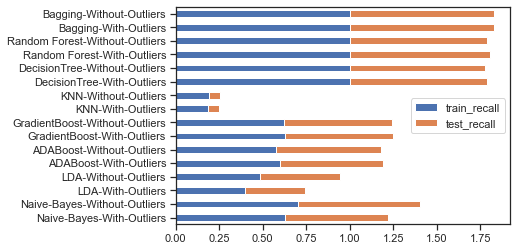

In [77]:
model_names = ['Naive-Bayes-With-Outliers', 'Naive-Bayes-Without-Outliers',
               'LDA-With-Outliers', 'LDA-Without-Outliers', 
               'ADABoost-With-Outliers', 'ADABoost-Without-Outliers',
              'GradientBoost-With-Outliers', 'GradientBoost-Without-Outliers',
               'KNN-With-Outliers', 'KNN-Without-Outliers',
               'DecisionTree-With-Outliers', 'DecisionTree-Without-Outliers',
              'Random Forest-With-Outliers', 'Random Forest-Without-Outliers',
               'Bagging-With-Outliers', 'Bagging-Without-Outliers']

train_recalls = [NB_train_recall_score, NB_train_recall_score_treated,
                 LDA_train_recall_score,LDA_train_recall_score_treated,
                ADB_train_recall_score,ADB_train_recall_score_treated,
                gbcl_train_recall_score,gbcl_train_recall_score_treated,
                KNN_train_recall_score,KNN_train_recall_score_treated,
                 DT_train_recall_score,DT_train_recall_score_treated,
                RF_train_recall_score,RF_train_recall_score_treated,
                 Bagging_train_recall_score,Bagging_train_recall_score_treated]
test_recalls = [NB_test_recall_score,NB_test_recall_score_treated,
                LDA_test_recall_score,LDA_test_recall_score_treated,
               ADB_test_recall_score,ADB_test_recall_score_treated,
                gbcl_test_recall_score,gbcl_test_recall_score_treated,
               KNN_test_recall_score,KNN_test_recall_score_treated,
                DT_test_recall_score,DT_test_recall_score_treated,
               RF_test_recall_score,RF_test_recall_score_treated,
               Bagging_test_recall_score, Bagging_test_recall_score_treated]

recall_df = pd.DataFrame({'train_recall':train_recalls,
                         'test_recall':test_recalls},
                        index=model_names)
recall_df.plot(kind='barh', stacked=True)


## Conclusion

•	Tenure is the feature with huge impact on the customer churn, this explains that customers with shorter tenure impact DTH company as No.of customers join and leave in a short rate, causing more onboarding and retaining losses.

•	DTH company must attract young tenure customers with a priority service and curated, custom DTH packages.

•	Once a customer expresses his concern to customer care, he/she must be pacified with younger Tenure customers treated well with extra channels of HD upgrade at nominal costs.

•	If a customer decides to leave DTH, he/she must be provided with a selective and competitive offer than the competitor, there by reducing the 5x cost of obtaining another customer at a small cost.


## SMOTE for Best Models

0    0.831616
1    0.168384
Name: CHURN, dtype: float64
1    0.5
0    0.5
Name: CHURN, dtype: float64
0.7954577815748256 0.8808201623237932
              precision    recall  f1-score   support

           0       0.86      0.71      0.78      7023
           1       0.75      0.88      0.81      7023

    accuracy                           0.80     14046
   macro avg       0.80      0.80      0.79     14046
weighted avg       0.80      0.80      0.79     14046

Accuracy Score:  0.7954577815748256


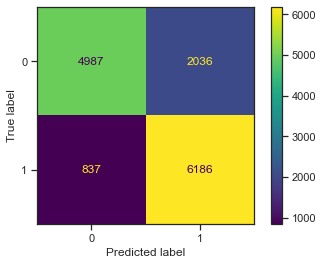

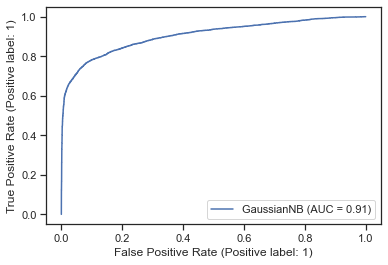

0.6785079928952042 0.5295358649789029
              precision    recall  f1-score   support

           0       0.88      0.71      0.79      2341
           1       0.27      0.53      0.36       474

    accuracy                           0.68      2815
   macro avg       0.58      0.62      0.57      2815
weighted avg       0.78      0.68      0.71      2815

Accuracy Score:  0.6785079928952042


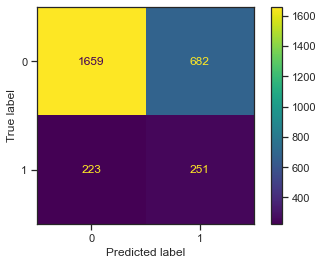

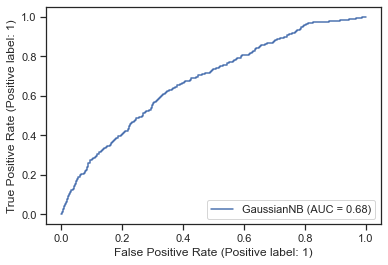

In [78]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train_treated, y_train_treated)

print(y_train_treated.value_counts(1))

print(y_train_res.value_counts(1))

# Naive Bayes with SMOTE

NB_model_treated = GaussianNB()
NB_model_treated.fit(X_train_res, y_train_res)

# Train Performance
## Performance Matrix on train data set
NB_train_predict_treated = NB_model_treated.predict(X_train_res)
NB_train_score_treated = NB_model_treated.score(X_train_res, y_train_res) # acc score
NB_train_recall_score_treated = recall_score(y_train_res,NB_train_predict_treated)
print(NB_train_score_treated,NB_train_recall_score_treated)

plot_confusion_matrix(NB_model_treated,X_train_res,y_train_res);
plt.grid(b=False,axis='both');

print(classification_report(y_train_res, NB_train_predict_treated))
print_roc_auc(NB_model_treated, X_train_res, y_train_res, NB_train_predict_treated)

# Test Performance
## Performance Matrix on test data set
NB_test_predict_treated = NB_model_treated.predict(X_test_treated)
NB_test_score_treated = NB_model_treated.score(X_test_treated, y_test_treated)
NB_test_recall_score_treated = recall_score(y_test_treated,NB_test_predict_treated)
print(NB_test_score_treated,NB_test_recall_score_treated)

plot_confusion_matrix(NB_model_treated, X_test_treated, y_test_treated)
plt.grid(b=False);

print(classification_report(y_test_treated, NB_test_predict_treated))
print_roc_auc(NB_model_treated, X_test_treated, y_test_treated, NB_test_predict_treated)

1.0 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7023
           1       1.00      1.00      1.00      7023

    accuracy                           1.00     14046
   macro avg       1.00      1.00      1.00     14046
weighted avg       1.00      1.00      1.00     14046

Accuracy Score:  1.0


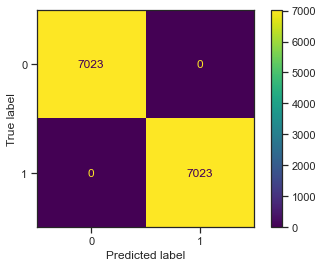

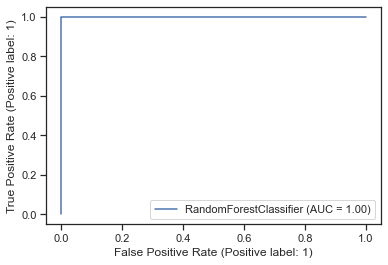

0.9566607460035524 0.8164556962025317
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2341
           1       0.92      0.82      0.86       474

    accuracy                           0.96      2815
   macro avg       0.94      0.90      0.92      2815
weighted avg       0.96      0.96      0.96      2815

Accuracy Score:  0.9566607460035524


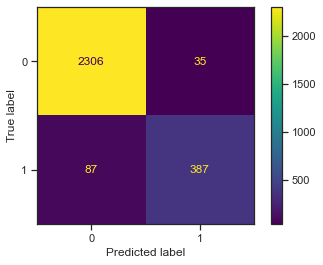

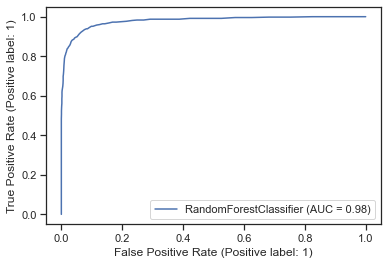

In [79]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train_res, y_train_res)

## Performance Matrix on train data set
RF_train_predict = RF_model.predict(X_train_res)
RF_train_score =RF_model.score(X_train_res, y_train_res)
RF_train_recall_score = recall_score(y_train_res,RF_train_predict)
print(RF_train_score,RF_train_recall_score)

plot_confusion_matrix(RF_model, X_train_res,y_train_res)
plt.grid(b=False);

print(classification_report(y_train_res, RF_train_predict))
print_roc_auc(RF_model, X_train_res, y_train_res, RF_train_predict)


## Performance Matrix on test data set
RF_test_predict = RF_model.predict(X_test)
RF_test_score = RF_model.score(X_test, y_test)
RF_test_recall_score = recall_score(y_test, RF_test_predict)
print(RF_test_score,RF_test_recall_score)

plot_confusion_matrix(RF_model,X_test,y_test)
plt.grid(b=False);

print(classification_report(y_test, RF_test_predict))
print_roc_auc(RF_model, X_test, y_test, RF_test_predict)

## Conclusion after SMOTE

1.	Random Forest algorithm has accuracy score of 100% and 95% respectively for train and test data. As we have imbalanced data, we will not use this metric to determine if the model is a good model.
2.	Recall score for Train data is 100% and Test data is 80%.
3.	On train data 100 of 100 times algorithm can predict customer churned, on test data only 82 times of 100 algorithm is able to predict.
4.	Deviation of 18% for recall score between is train and test are not a good parameter for a prediction model.
5.	However, Train and Test sensitivity increased by 2% and it is good to see this score improving after SMOTE, will be considered as a best model for Prediction.
